In [1]:
### -------- Bibliotecas -------- ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Funções#
### -------- Preparo dos dados -------- ###
def open_pnad_dict(path, sheet_name='dicionário pnad covid'):
    '''Carregar arquivo excel com dicionário de variáveis PNAD COVID-19
    
    Params:
    path: str, caminho do arquivo
    sheet_name: str, nome da aba do arquivo excel
                default='dicionário pnad covid'
    
    Returns:
    pnad_dict: pandas DataFrame, dicionário de variáveis da PNAD COVID-19
    
    '''
    # pandas read excel
    pnad_dict = pd.read_excel(path, sheet_name=sheet_name, header=1, usecols='B:F', engine='xlrd')
    # rename columns
    pnad_dict.columns = ['questao', 'descricao', 'categoria', 'tipo', 'valor']
    # drop 0, 1, 2 rows
    pnad_dict = pnad_dict.drop([0, 1, 2])
    
    return pnad_dict



def clean_pnad_dict(df):
    ''' Preenche valores vazios quando há um dado anterior de referência,
        substiuiu quebras de linha textuais, símbolos e espaçoes duplos.
        
    Params:
    df: pandas DataFrame, dicionário de variáveis da PNAD COVID-19
    
    Returns:
    cleaned_pnad_dict: pandas DataFrame, dicionário de variáveis da PNAD COVID-19 limpo
    
    '''
    # ffills to fill the NaN values
    cleaned_pnad_dict = df.copy()
    cleaned_pnad_dict = df.ffill()
    # all lower case
    cleaned_pnad_dict = cleaned_pnad_dict.apply(lambda x: x.str.lower() 
                                                if x.dtype == 'object' else x)
    # replace all keys in df
    replaces = {
            '  ': ' ', 
            r'\n': ' ',
            r'\r': ' ',
            r'/': ' ou ',
            r'%': '_por_cento',
            }
    
    cleaned_pnad_dict = df.replace(replaces, regex=True)

    return cleaned_pnad_dict



def merge_dicts(dicts, drop_duplicates=True):
    '''Concatena os dicionários de variáveis PNAD COVID-19 e 
        remove duplicatas
    
    Params:
    dicts: list, lista de dicionários
    drop_duplicates: bool, default=True, remover duplicatas
    
    Returns:
    merged_dict: pandas DataFrame, dicionário de variáveis PNAD COVID-19
    
    '''
    # merge all dicts
    merged_dict = pd.concat(dicts)
    # ffills to fill the NaN values
    merged_dict = merged_dict.ffill()
    # drop duplicates
    if drop_duplicates:
        merged_dict = merged_dict.drop_duplicates()
    # if questao and valor are the same, drop
    merged_dict = merged_dict.drop_duplicates(subset=['questao', 'valor'])
    
    return merged_dict



def map_code_questao(df, questao=None, key='tipo', value='valor'):
    '''Retorna um dicionário com a chave e valor de um DataFrame
    
    Params:
    df: pandas DataFrame, dicionário de variáveis PNAD COVID-19
    questao: str, default=None, questão a ser filtrada
    key: str, default='tipo', chave do dicionário
    value: str, default='valor', valor do dicionário
    
    Returns:
    dict: dict, dicionário com a chave e valor do DataFrame
    
    '''
    if questao is None:
        return dict(zip(df[key], df[value]))
    
    else:
        return dict(zip(df.query(f'questao == "{questao}"')[key], 
                    df.query(f'questao == "{questao}"')[value]))



def read_microdata(dfs, selected_questions=None, rename_columns=False):
    '''Carrega os arquivos de microdados da PNAD COVID-19 e 
        filtra as colunas selecionadas
    
    Params:
    dfs: list, lista de DataFrames
    selected_questions: dict, dicionário com as questões selecionadas
    rename_columns: bool, default=False, renomear as colunas
                    default=False
    
    Returns:
    df: pandas DataFrame, microdados da PNAD COVID-19
    
    '''
    if selected_questions is None: 
        # merge all dfs
        df = pd.concat(dfs)
    else:
        # merge all dfs
        df = pd.concat(dfs)
        # filter selected questions
        df = df[list(selected_questions.keys())]
    # rename columns with selected_questions
    if rename_columns:
        df.columns = [selected_questions[col] for col in df.columns]
        
    return df



def make_df_from_dict(dict, df):
    '''Cria um DataFrame com as colunas do dicionário e 
        os valores do DataFrame
    
    Params:
    dict: dict, dicionário com as colunas do DataFrame
    df: pandas DataFrame, DataFrame com os valores
    
    Returns:
    df: pandas DataFrame, DataFrame com as colunas renomeadas
    
    '''
    # select keys as name of columns
    cols = list(dict.keys())
    # filter cols in df
    df = df[cols].copy()
    # rename columns with values of dict
    df.columns = [dict[col] for col in df.columns]
    
    return df

In [2]:
# mostrar todas as colunas do df (tira a configuração padrão do pandas, quanto o df tem muitas colunas)
pd.set_option('display.max_columns', None)

In [3]:
dict_09 = open_pnad_dict('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/Dicionario_PNAD_COVID_092020_20220621.xls')
dict_10 = open_pnad_dict('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/Dicionario_PNAD_COVID_102020_20220621.xls')
dict_11 = open_pnad_dict('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/Dicionario_PNAD_COVID_112020_20220621.xls')

dicts = [dict_09, dict_10, dict_11]

for d in dicts:
    print(d.shape)

(641, 5)
(641, 5)
(656, 5)


In [4]:
dict_09_clean = clean_pnad_dict(dict_09)
dict_10_clean = clean_pnad_dict(dict_10)
dict_11_clean = clean_pnad_dict(dict_11)

dicts_clean = [dict_09_clean, dict_10_clean, dict_11_clean]

for d in dicts_clean:
    print(f'shape: {d.shape}')

shape: (641, 5)
shape: (641, 5)
shape: (656, 5)


In [5]:
pnad_dict = merge_dicts(dicts_clean)

pnad_dict

,questao,descricao,categoria,tipo,valor
3,UF,NaN,Unidade da Federação,11,Rondônia
4,UF,NaN,Unidade da Federação,12,Acre
5,UF,NaN,Unidade da Federação,13,Amazonas
6,UF,NaN,Unidade da Federação,14,Roraima
7,UF,NaN,Unidade da Federação,15,Pará
...,...,...,...,...,...
155,A007A,A7a,Por que não realizou as atividades disponibili...,3,Por problemas de saúde da própria pessoa
156,A007A,A7a,Por que não realizou as atividades disponibili...,4,"Tinha que cuidar dos afazeres domésticos, do(s..."
157,A007A,A7a,Por que não realizou as atividades disponibili...,5,Não conseguiu se concentrar
158,A007A,A7a,Por que não realizou as atividades disponibili...,6,Outro motivo. Especifique.


In [6]:
# visualizar todas as questões
questao_dict = map_code_questao(pnad_dict, key='questao', value='categoria')

questao_dict

{'UF': 'Unidade da Federação',
 'CAPITAL': 'Capital',
 'RM_RIDE': 'Região Metropolitana e Região Administrativa Integrada de Desenvolvimento',
 'V1008': 'Número de seleção do domicílio',
 'V1012': 'Semana no mês',
 'V1013': 'Mês da pesquisa',
 'V1016': 'Número da entrevista no domicílio',
 'Estrato': 'Estrato',
 'UPA': 'UPA',
 'V1022': 'Situação do domicílio',
 'V1023': 'Tipo de área',
 'V1030': 'Projeção da população',
 'V1031': 'Peso do domicílio e das pessoas',
 'V1032': 'Peso do domicílio e das pessoas',
 'posest': 'Domínios de projeção',
 'A001': 'Número de ordem',
 'A001A': 'Condição no domicílio',
 'A001B1': 'Dia de nascimento',
 'A001B2': 'Mês de nascimento',
 'A001B3': 'Ano de nascimento',
 'A002': 'Idade do morador ',
 'A003': 'Sexo',
 'A004': 'Cor ou raça',
 'A005': 'Escolaridade',
 'A006': 'Frequenta escola',
 'A007': 'Na semana passada, _____ foram disponibilizadas atividades escolares para realizar em casa?',
 'A008': 'Na semana passada, em quantos dias _____ dedicou-se à

In [7]:
df_09 = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/PNAD_COVID_092020.csv',
                    decimal=',', thousands='.', encoding='latin1')

df_10 = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/PNAD_COVID_102020.csv',
                    decimal=',', thousands='.', encoding='latin1')

df_11 = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/PNAD_COVID_112020.csv',
                    decimal=',', thousands='.', encoding='latin1')

dfs = [df_09, df_10, df_11]

for d in dfs:
    print(f'shape: {d.shape}')

shape: (387298, 145)
shape: (380461, 145)
shape: (381438, 148)


In [8]:
# read microdata
df = read_microdata(dfs)
# por enquanto, todos os dados são do tipo float
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 1149197 entries, 0 to 381437
Columns: 148 entries, Ano to A007A
dtypes: float64(88), int64(60)
memory usage: 1.3 GB


In [9]:
# relacionar códigos e nomes de estados
uf = pnad_dict.query('questao == "UF"')[['tipo', 'valor']].copy()

# into dict
uf_dict = dict(zip(uf.tipo, uf.valor))

uf_dict

{11: 'Rondônia',
 12: 'Acre',
 13: 'Amazonas',
 14: 'Roraima',
 15: 'Pará',
 16: 'Amapá',
 17: 'Tocantins',
 21: 'Maranhão',
 22: 'Piauí',
 23: 'Ceará',
 24: 'Rio Grande do Norte',
 25: 'Paraíba',
 26: 'Pernambuco',
 27: 'Alagoas',
 28: 'Sergipe',
 29: 'Bahia',
 31: 'Minas Gerais',
 32: 'Espírito Santo',
 33: 'Rio de Janeiro',
 35: 'São Paulo',
 41: 'Paraná',
 42: 'Santa Catarina',
 43: 'Rio Grande do Sul',
 50: 'Mato Grosso do Sul',
 51: 'Mato Grosso',
 52: 'Goiás',
 53: 'Distrito Federal'}

In [10]:
# meses: 9, 10, 11
df_9a11 = df = read_microdata([df_09, df_10, df_11])

df_9a11.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006,A006A,A006B,A007A
0,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,1,1,152677,13393337786,16420936068,1114,1,1,5,8,1984,36,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
1,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,1,1,150642,13393337786,16694461021,1124,2,2,18,8,1990,30,2,4,7,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,NaN,27.0,20.0,NaN,NaN,NaN,NaN,36.0,36.0,2.0,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
2,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,1,1,145237,13393337786,17188775372,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
3,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,1,1,145237,13393337786,17188775372,1112,4,4,24,8,2009,11,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
4,2020,11,11.0,NaN,2,1,9,5,1110011,110015970,1,1,91889,13393337786,12753668218,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN


In [11]:
# sigla UF para nome do estado
df_9a11['UF'] = df_9a11['UF'].map(uf_dict)

df_9a11.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006,A006A,A006B,A007A
0,2020,Rondônia,11.0,NaN,1,4,9,5,1110011,110015970,1,1,152677,13393337786,16420936068,1114,1,1,5,8,1984,36,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
1,2020,Rondônia,11.0,NaN,1,4,9,5,1110011,110015970,1,1,150642,13393337786,16694461021,1124,2,2,18,8,1990,30,2,4,7,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,NaN,27.0,20.0,NaN,NaN,NaN,NaN,36.0,36.0,2.0,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
2,2020,Rondônia,11.0,NaN,1,4,9,5,1110011,110015970,1,1,145237,13393337786,17188775372,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
3,2020,Rondônia,11.0,NaN,1,4,9,5,1110011,110015970,1,1,145237,13393337786,17188775372,1112,4,4,24,8,2009,11,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN
4,2020,Rondônia,11.0,NaN,2,1,9,5,1110011,110015970,1,1,91889,13393337786,12753668218,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0,NaN,NaN,NaN


In [12]:
identificacao = {
    'UF': 'uf',
    'V1012': 'semana',
    'V1013': 'mes',
    'V1016': 'no_entrevista',
    'Estrato': 'estrato',
    'UPA': 'upa',
    'F0061': 'respondente',
    'V1022': 'status_domicilio',
    'V1030': 'proj_populacao',
    'A001A': 'condicao_no_domicilio',
    'A002': 'idade_morador',
    'A003': 'sexo',
    'A004': 'cor_raca'
    }

id_df = make_df_from_dict(identificacao, df_9a11)

print(f'id_df: {id_df.shape}')
id_df.head()

id_df: (1149197, 13)


,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca
0,Rondônia,4,9,5,1110011,110015970,1,1,152677,1,36,1,4
1,Rondônia,4,9,5,1110011,110015970,1,1,150642,2,30,2,4
2,Rondônia,4,9,5,1110011,110015970,1,1,145237,4,13,1,4
3,Rondônia,4,9,5,1110011,110015970,1,1,145237,4,11,1,4
4,Rondônia,1,9,5,1110011,110015970,1,1,91889,1,57,2,1


In [13]:
# map values of F0061
respondente_dict = map_code_questao(pnad_dict, 'F0061', key='tipo', value='valor')
# map in id_df
id_df['respondente'] = id_df['respondente'].map(respondente_dict)

# map values of V1022
status_domicilio_dict = map_code_questao(pnad_dict, 'V1022', key='tipo', value='valor')
id_df['status_domicilio'] = id_df['status_domicilio'].map(status_domicilio_dict)

# map values for A001A
a001a_dict = pnad_dict.query('questao == "A001A"').copy()
# tipo as int
a001a_dict['tipo'] = a001a_dict['tipo'].astype(int)

# map in id_df
condicao_no_domicilio_dict = map_code_questao(a001a_dict, 'A001A', key='tipo', value='valor')
id_df['condicao_no_domicilio'] = id_df['condicao_no_domicilio'].map(condicao_no_domicilio_dict)

# map values for A003
# where 1 = Masculino, 2 = Feminino
sexo_dict = {1: 'masculino', 2: 'feminino'}
id_df['sexo'] = id_df['sexo'].map(sexo_dict)

# map values for A004
cor_raca_dict = map_code_questao(pnad_dict, 'A004', key='tipo', value='valor')
id_df['cor_raca'] = id_df['cor_raca'].map(cor_raca_dict)

id_df.head()

,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,36,masculino,Parda
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,30,feminino,Parda
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,13,masculino,Parda
3,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,11,masculino,Parda
4,Rondônia,1,9,5,1110011,110015970,Pessoa moradora,Urbana,91889,Pessoa responsável pelo domicílio,57,feminino,Branca


In [14]:
escola = {
    'A005': 'escolaridade',
    'A006': 'frequenta_escola',
    'A007': 'atividades_escolares_realizar_em_casa',
    'A008': 'dias_dedicados_atividades_escolares',
    'A009': 'tempo_diario_atividades_escolares',
    'A006A': 'ensino_publico_ou_privado',
    'A006B': 'tendo_aulas_presenciais'
    }

escola_df = make_df_from_dict(escola, df_9a11)

escola_df.head()

,escolaridade,frequenta_escola,atividades_escolares_realizar_em_casa,dias_dedicados_atividades_escolares,tempo_diario_atividades_escolares,ensino_publico_ou_privado,tendo_aulas_presenciais
0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,1.0,5.0,3.0,NaN,NaN
3,2,1.0,1.0,5.0,3.0,NaN,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# query A005
escolaridade_dict = map_code_questao(pnad_dict, 'A005', key='tipo', value='valor')

# map in escola_df
escola_df['escolaridade'] = escola_df['escolaridade'].map(escolaridade_dict)

escola_df.head()

,escolaridade,frequenta_escola,atividades_escolares_realizar_em_casa,dias_dedicados_atividades_escolares,tempo_diario_atividades_escolares,ensino_publico_ou_privado,tendo_aulas_presenciais
0,Médio completo,NaN,NaN,NaN,NaN,NaN,NaN
1,Superior completo,NaN,NaN,NaN,NaN,NaN,NaN
2,Fundamental incompleto,1.0,1.0,5.0,3.0,NaN,NaN
3,Fundamental incompleto,1.0,1.0,5.0,3.0,NaN,NaN
4,Fundamental incompleto,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# A005
# map values 1 = sim, 2 = não
freq_escola_dict = {1: 'Sim', 2: 'Não'}

# map in escola_df
escola_df['frequenta_escola'] = escola_df['frequenta_escola'].map(freq_escola_dict)

# Nan to Não informado
escola_df['frequenta_escola'] = escola_df['frequenta_escola'].fillna('Não informado')

# value conts
escola_df['frequenta_escola'].value_counts()

frequenta_escola
Não informado    762761
Sim              239361
Não              147075
Name: count, dtype: int64

In [17]:
# A007
atividades_escolares_realizar_em_casa_dict = map_code_questao(pnad_dict, 'A007', key='tipo', value='valor')

# map in escola_df
escola_df['atividades_escolares_realizar_em_casa'] = escola_df['atividades_escolares_realizar_em_casa']\
    .map(atividades_escolares_realizar_em_casa_dict)
    
# if Nan = Não informado
escola_df['atividades_escolares_realizar_em_casa'] = escola_df['atividades_escolares_realizar_em_casa']\
    .fillna('Não informado / Não aplicável')
    
# make Não informado and Não aplicável as "Não informado / Não aplicável"
escola_df['atividades_escolares_realizar_em_casa'] = escola_df['atividades_escolares_realizar_em_casa']\
    .replace({'Não aplicável': 'Não informado / Não aplicável'})

escola_df['atividades_escolares_realizar_em_casa'].value_counts()

atividades_escolares_realizar_em_casa
Não informado / Não aplicável                  914674
Sim, e realizou pelo menos parte delas         197353
Não                                             31703
Sim, mas não realizou (por qualquer motivo)      5467
Name: count, dtype: int64

In [18]:
a008_dict = pnad_dict.query('questao == "A008"').copy()

# where tipo is 6, fill valor for "6 ou 7 dias / Não aplicável"
a008_dict['valor'] = np.where(a008_dict['tipo'] == 6, 
                            '6 ou 7 dias / Não aplicável', 
                            a008_dict['valor'])

# map_code_questao
a008_dict = map_code_questao(a008_dict, 'A008', key='tipo', value='valor')

# map in escola_df
escola_df['dias_dedicados_atividades_escolares'] = escola_df['dias_dedicados_atividades_escolares']\
    .map(a008_dict)

# if NaN = Não informado
escola_df['dias_dedicados_atividades_escolares'] = escola_df['dias_dedicados_atividades_escolares']\
    .fillna('Não informado')

escola_df['dias_dedicados_atividades_escolares'].value_counts()

dias_dedicados_atividades_escolares
Não informado                  951844
5 dias                         127438
3 dias                          29017
4 dias                          18327
2 dias                          11666
6 ou 7 dias / Não aplicável      6213
1 dia                            4692
Name: count, dtype: int64

In [19]:
# A009
a009_dict = pnad_dict.query('questao == "A009"').copy()
# if 4, fill valor for "5 horas ou mais / Não aplicável"
a009_dict['valor'] = np.where(a009_dict['tipo'] == 4, 
                            '5 horas ou mais / Não aplicável', 
                            a009_dict['valor'])

# map_code_questao
a009_dict = map_code_questao(a009_dict, 'A009', key='tipo', value='valor')

# map in escola_df
escola_df['tempo_diario_atividades_escolares'] = escola_df['tempo_diario_atividades_escolares']\
    .map(a009_dict)
    
# if NaN = Não informado
escola_df['tempo_diario_atividades_escolares'] = escola_df['tempo_diario_atividades_escolares']\
    .fillna('Não informado')

escola_df['tempo_diario_atividades_escolares'].value_counts()

tempo_diario_atividades_escolares
Não informado                      951844
De 2 horas a menos de 5 horas      101807
De 1 hora a menos de 2 horas        69670
5 horas ou mais / Não aplicável     16478
Menos de 1 hora                      9398
Name: count, dtype: int64

In [20]:
a006a_dict = pnad_dict.query('questao == "A006A"').copy()
# if 2 = Privada / Não aplicável
a006a_dict['valor'] = np.where(a006a_dict['tipo'] == 2, 
                            'Privada / Não aplicável', 
                            a006a_dict['valor'])

# map_code_questao
a006a_dict = map_code_questao(a006a_dict, 'A006A', key='tipo', value='valor')

# map in escola_df
escola_df['ensino_publico_ou_privado'] = escola_df['ensino_publico_ou_privado']\
    .map(a006a_dict)

# if NaN = Não informado
escola_df['ensino_publico_ou_privado'] = escola_df['ensino_publico_ou_privado']\
    .fillna('Não informado')
    
escola_df['ensino_publico_ou_privado'].value_counts()

ensino_publico_ou_privado
Não informado              1069904
Pública                      62143
Privada / Não aplicável      17150
Name: count, dtype: int64

In [21]:
a006b_dict = pnad_dict.query('questao == "A006B"').copy() # add copy em tudo o que for feito assim
# if 4 = Não, meu curso é online / Não aplicável
a006b_dict['valor'] = np.where(a006b_dict['tipo'] == 4, 
                            'Não, meu curso é online / Não aplicável', 
                            a006b_dict['valor'])

# map_code_questao
a006b_dict = map_code_questao(a006b_dict, 'A006B', key='tipo', value='valor')

# map in escola_df
escola_df['tendo_aulas_presenciais'] = escola_df['tendo_aulas_presenciais']\
    .map(a006b_dict)
    
# if NaN = Não informado
escola_df['tendo_aulas_presenciais'] = escola_df['tendo_aulas_presenciais']\
    .fillna('Não informado')

escola_df['tendo_aulas_presenciais'].value_counts()


tendo_aulas_presenciais
Não informado                                            1069904
Não, e meu normalmente é presencial ou semipresencial      55615
Não, meu curso é online / Não aplicável                    16962
Sim, mas apenas parcialmente                                4683
Sim, normalmente                                            2033
Name: count, dtype: int64

In [22]:
escola_df

,escolaridade,frequenta_escola,atividades_escolares_realizar_em_casa,dias_dedicados_atividades_escolares,tempo_diario_atividades_escolares,ensino_publico_ou_privado,tendo_aulas_presenciais
0,Médio completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado
1,Superior completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado
2,Fundamental incompleto,Sim,"Sim, e realizou pelo menos parte delas",5 dias,De 2 horas a menos de 5 horas,Não informado,Não informado
3,Fundamental incompleto,Sim,"Sim, e realizou pelo menos parte delas",5 dias,De 2 horas a menos de 5 horas,Não informado,Não informado
4,Fundamental incompleto,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado
...,...,...,...,...,...,...,...
381433,Fundamental completa,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado
381434,Superior completo,Não,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado
381435,Fundamental completa,Sim,"Sim, e realizou pelo menos parte delas",5 dias,De 2 horas a menos de 5 horas,Pública,"Não, meu curso é online / Não aplicável"
381436,Fundamental incompleto,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado


In [23]:
itens_higiene = {
    'F002A1': 'domicilio_tem_sabao_detergente',
    'F002A2': 'domicilio_tem_alcool_70mais',
    'F002A3': 'domicilio_tem_mascaras',
    'F002A4': 'domicilio_tem_luvas_descartaveis',
    'F002A5': 'domicilio_tem_agua_sanitaria_desinfetante',
    }

itens_higiene_df = make_df_from_dict(itens_higiene, df_9a11)

itens_higiene_df.head()

,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante
0,1,1,1,2,1
1,1,1,1,2,1
2,1,1,1,2,1
3,1,1,1,2,1
4,1,1,1,2,1


In [24]:
# map values for F002A1
f002a1_dict = map_code_questao(pnad_dict, 'F002A1', key='tipo', value='valor')

# map in itens_higiene_df
itens_higiene_df['domicilio_tem_sabao_detergente'] = itens_higiene_df['domicilio_tem_sabao_detergente']\
    .map(f002a1_dict)

# check nan
print('NaN: ', itens_higiene_df['domicilio_tem_sabao_detergente'].isna().sum())

# value counts
itens_higiene_df['domicilio_tem_sabao_detergente'].value_counts()

NaN:  0


domicilio_tem_sabao_detergente
Sim         1145377
Não            3529
Não sabe        291
Name: count, dtype: int64

In [25]:
# map values for F002A2
f002a2_dict = map_code_questao(pnad_dict, 'F002A2', key='tipo', value='valor')

# map in itens_higiene_df
itens_higiene_df['domicilio_tem_alcool_70mais'] = itens_higiene_df['domicilio_tem_alcool_70mais']\
    .map(f002a2_dict)

# check nan
print('NaN: ', itens_higiene_df['domicilio_tem_alcool_70mais'].isna().sum())

# value counts
itens_higiene_df['domicilio_tem_alcool_70mais'].value_counts()

NaN:  0


domicilio_tem_alcool_70mais
Sim         1106800
Não           41264
Não sabe       1133
Name: count, dtype: int64

In [26]:
# map values for F002A3
f002a3_dict = map_code_questao(pnad_dict, 'F002A3', key='tipo', value='valor')

# map in itens_higiene_df
itens_higiene_df['domicilio_tem_mascaras'] = itens_higiene_df['domicilio_tem_mascaras']\
    .map(f002a3_dict)

# check nan
print('NaN: ', itens_higiene_df['domicilio_tem_mascaras'].isna().sum())

# value counts
itens_higiene_df['domicilio_tem_mascaras'].value_counts()

NaN:  0


domicilio_tem_mascaras
Sim         1143683
Não            5240
Não sabe        274
Name: count, dtype: int64

In [27]:
# map values for F002A4
f002a4_dict = map_code_questao(pnad_dict, 'F002A4', key='tipo', value='valor')

# map in itens_higiene_df
itens_higiene_df['domicilio_tem_luvas_descartaveis'] = itens_higiene_df['domicilio_tem_luvas_descartaveis']\
    .map(f002a4_dict)
    
# check nan
print('NaN: ', itens_higiene_df['domicilio_tem_luvas_descartaveis'].isna().sum())

# value counts
itens_higiene_df['domicilio_tem_luvas_descartaveis'].value_counts()

NaN:  0


domicilio_tem_luvas_descartaveis
Não         711631
Sim         432730
Não sabe      4836
Name: count, dtype: int64

In [28]:
# map values for F002A5
f002a5_dict = map_code_questao(pnad_dict, 'F002A5', key='tipo', value='valor')

# map in itens_higiene_df
itens_higiene_df['domicilio_tem_agua_sanitaria_desinfetante'] = itens_higiene_df['domicilio_tem_agua_sanitaria_desinfetante']\
    .map(f002a5_dict)

# check nan
print('NaN: ', itens_higiene_df['domicilio_tem_agua_sanitaria_desinfetante'].isna().sum())

# value counts
itens_higiene_df['domicilio_tem_agua_sanitaria_desinfetante'].value_counts()

NaN:  0


domicilio_tem_agua_sanitaria_desinfetante
Sim         1134345
Não           13749
Não sabe       1103
Name: count, dtype: int64

In [29]:
# check
itens_higiene_df.head()

,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante
0,Sim,Sim,Sim,Não,Sim
1,Sim,Sim,Sim,Não,Sim
2,Sim,Sim,Sim,Não,Sim
3,Sim,Sim,Sim,Não,Sim
4,Sim,Sim,Sim,Não,Sim


In [30]:
sintomas = {
    'B0011': 'febre',
    'B0012': 'tosse',
    'B0013': 'dor_garganta',
    'B0014': 'dificuldade_respirar',
    'B0015': 'dor_cabeca',
    'B0016': 'dor_peito',
    'B0017': 'nausea',
    'B0018': 'nariz_entupido_coriza',
    'B0019': 'fadiga',
    'B00110': 'dor_olhos',
    'B00111': 'perda_olfato_paladar',
    'B00112': 'dor_muscular',
    'B00113': 'diarreia'
    }

sintomas_df = make_df_from_dict(sintomas, df_9a11)

sintomas_df.head()

,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia
0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,2,2,2


In [31]:
# map values for B0011
b0011_dict = map_code_questao(pnad_dict, 'B0011', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['febre'] = sintomas_df['febre']\
    .map(b0011_dict)

# check nan
print('NaN: ', sintomas_df['febre'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['febre'] = sintomas_df['febre']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['febre'].value_counts()

NaN:  0


febre
Não                    1136024
Sim                       9020
Ignorado / Não sabe       4153
Name: count, dtype: int64

In [32]:
# map values for B0012
b0012_dict = map_code_questao(pnad_dict, 'B0012', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['tosse'] = sintomas_df['tosse']\
    .map(b0012_dict)
    
# check nan
print('NaN: ', sintomas_df['tosse'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['tosse'] = sintomas_df['tosse']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['tosse'].value_counts()

NaN:  0


tosse
Não                    1129630
Sim                      15373
Ignorado / Não sabe       4194
Name: count, dtype: int64

In [33]:
# map values for B0013
b0013_dict = map_code_questao(pnad_dict, 'B0013', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dor_garganta'] = sintomas_df['dor_garganta']\
    .map(b0013_dict)

# check nan
print('NaN: ', sintomas_df['dor_garganta'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dor_garganta'] = sintomas_df['dor_garganta']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dor_garganta'].value_counts()

NaN:  0


dor_garganta
Não                    1132408
Sim                      12557
Ignorado / Não sabe       4232
Name: count, dtype: int64

In [34]:
# map values for B0014
b0014_dict = map_code_questao(pnad_dict, 'B0014', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dificuldade_respirar'] = sintomas_df['dificuldade_respirar']\
    .map(b0014_dict)

# check nan
print('NaN: ', sintomas_df['dificuldade_respirar'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dificuldade_respirar'] = sintomas_df['dificuldade_respirar']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dificuldade_respirar'].value_counts()

NaN:  0


dificuldade_respirar
Não                    1140175
Sim                       4799
Ignorado / Não sabe       4223
Name: count, dtype: int64

In [35]:
# map values for B0015
b0015_dict = map_code_questao(pnad_dict, 'B0015', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dor_cabeca'] = sintomas_df['dor_cabeca']\
    .map(b0015_dict)

# check nan
print('NaN: ', sintomas_df['dor_cabeca'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dor_cabeca'] = sintomas_df['dor_cabeca']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dor_cabeca'].value_counts()

NaN:  0


dor_cabeca
Não                    1125929
Sim                      18960
Ignorado / Não sabe       4308
Name: count, dtype: int64

In [36]:
# map values for B0016
b0016_dict = map_code_questao(pnad_dict, 'B0016', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dor_peito'] = sintomas_df['dor_peito']\
    .map(b0016_dict)

# check nan
print('NaN: ', sintomas_df['dor_peito'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dor_peito'] = sintomas_df['dor_peito']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dor_peito'].value_counts()

NaN:  0


dor_peito
Não                    1141462
Ignorado / Não sabe       4287
Sim                       3448
Name: count, dtype: int64

In [37]:
# map values for B0017
b0017_dict = map_code_questao(pnad_dict, 'B0017', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['nausea'] = sintomas_df['nausea']\
    .map(b0017_dict)

# check nan
print('NaN: ', sintomas_df['nausea'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['nausea'] = sintomas_df['nausea']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['nausea'].value_counts()

NaN:  0


nausea
Não                    1140959
Ignorado / Não sabe       4280
Sim                       3958
Name: count, dtype: int64

In [38]:
# map values for B0018
b0018_dict = map_code_questao(pnad_dict, 'B0018', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['nariz_entupido_coriza'] = sintomas_df['nariz_entupido_coriza']\
    .map(b0018_dict)

# check nan
print('NaN: ', sintomas_df['nariz_entupido_coriza'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['nariz_entupido_coriza'] = sintomas_df['nariz_entupido_coriza']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['nariz_entupido_coriza'].value_counts()

NaN:  0


nariz_entupido_coriza
Não                    1128818
Sim                      16140
Ignorado / Não sabe       4239
Name: count, dtype: int64

In [39]:
# map values for B0019
b0019_dict = map_code_questao(pnad_dict, 'B0019', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['fadiga'] = sintomas_df['fadiga']\
    .map(b0019_dict)

# check nan
print('NaN: ', sintomas_df['fadiga'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['fadiga'] = sintomas_df['fadiga']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['fadiga'].value_counts()

NaN:  0


fadiga
Não                    1136724
Sim                       8208
Ignorado / Não sabe       4265
Name: count, dtype: int64

In [40]:
# map values for B00110
b00110_dict = map_code_questao(pnad_dict, 'B00110', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dor_olhos'] = sintomas_df['dor_olhos']\
    .map(b00110_dict)

# check nan
print('NaN: ', sintomas_df['dor_olhos'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dor_olhos'] = sintomas_df['dor_olhos']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dor_olhos'].value_counts()

NaN:  0


dor_olhos
Não                    1140098
Ignorado / Não sabe       5428
Sim                       3671
Name: count, dtype: int64

In [41]:
# map values for B00111
b00111_dict = map_code_questao(pnad_dict, 'B00111', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['perda_olfato_paladar'] = sintomas_df['perda_olfato_paladar']\
    .map(b00111_dict)

# check nan
print('NaN: ', sintomas_df['perda_olfato_paladar'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['perda_olfato_paladar'] = sintomas_df['perda_olfato_paladar']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['perda_olfato_paladar'].value_counts()

NaN:  0


perda_olfato_paladar
Não                    1139426
Ignorado / Não sabe       5358
Sim                       4413
Name: count, dtype: int64

In [42]:
# map values for B00112
b00112_dict = map_code_questao(pnad_dict, 'B00112', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['dor_muscular'] = sintomas_df['dor_muscular']\
    .map(b00112_dict)

# check nan
print('NaN: ', sintomas_df['dor_muscular'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['dor_muscular'] = sintomas_df['dor_muscular']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['dor_muscular'].value_counts()

NaN:  0


dor_muscular
Não                    1133070
Sim                      10883
Ignorado / Não sabe       5244
Name: count, dtype: int64

In [43]:
# map values for B00113
b00113_dict = map_code_questao(pnad_dict, 'B00113', key='tipo', value='valor')

# map in sintomas_df
sintomas_df['diarreia'] = sintomas_df['diarreia']\
    .map(b00113_dict)

# check nan
print('NaN: ', sintomas_df['diarreia'].isna().sum())

# if Ignorado or Não sabe, then "Ignorado / Não sabe"
sintomas_df['diarreia'] = sintomas_df['diarreia']\
    .replace({'Ignorado': 'Ignorado / Não sabe', 'Não sabe': 'Ignorado / Não sabe'})

# value counts
sintomas_df['diarreia'].value_counts()

NaN:  0


diarreia
Não                    1139488
Ignorado / Não sabe       5408
Sim                       4301
Name: count, dtype: int64

In [44]:
# check df
sintomas_df.head()

,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia
0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
3,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [45]:
providencias = {
    'B011': 'como_restringiu_contato_fisico',
    'B002': 'compareceu_estabelecimento_de_saude',
    'B0031': 'ficou_em_casa',
    'B0032': 'ligou_profissional_saude',
    'B0033': 'automedicou',
    'B0034': 'prescricao_medica',
    'B0035': 'visita_profissional_saude_sus',
    'B0036': 'visita_de_profissional_saude_particular',
    'B0037': 'outra_providencia'
}

providencias_df = make_df_from_dict(providencias, df_9a11)

providencias_df.head()

,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# check nan % for each column
for col in providencias_df.columns:
    if providencias_df[col].isna().sum() > 0:
        print(f'{col}: {providencias_df[col].isna().mean():.2%}')

compareceu_estabelecimento_de_saude: 96.09%
ficou_em_casa: 97.12%
ligou_profissional_saude: 97.12%
automedicou: 97.12%
prescricao_medica: 97.12%
visita_profissional_saude_sus: 97.12%
visita_de_profissional_saude_particular: 97.12%
outra_providencia: 97.12%


In [47]:
# map values for B011
b011_dict = map_code_questao(pnad_dict, 'B011', key='tipo', value='valor')

# map in providencias_df
providencias_df['como_restringiu_contato_fisico'] = providencias_df['como_restringiu_contato_fisico']\
    .map(b011_dict)
    
# check nan
print('NaN: ', providencias_df['como_restringiu_contato_fisico'].isna().sum())

# value counts
providencias_df['como_restringiu_contato_fisico'].value_counts()

NaN:  0


como_restringiu_contato_fisico
Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e ou ou recebendo visitas    484513
Ficou em casa e só saiu em caso de necessidade básica                                                                                  458950
Ficou rigorosamente em casa                                                                                                            154593
Não fez restrição, levou vida normal como antes da pandemia                                                                             46194
Ignorado                                                                                                                                 4947
Name: count, dtype: int64

In [48]:
# for all other columns, same dict,
# Não informado = NaN
# 1.0 = Sim, 2.0 = Não, 9.0 = Ignorado / Não aplicável
providencia_dicts = {1.0: 'Sim', 2.0: 'Não', 9.0: 'Ignorado / Não aplicável'}

# get all columns that are not B011
for col in providencias_df.columns[1:]:
    # map in providencias_df
    providencias_df[col] = providencias_df[col]\
        .map(providencia_dicts)
    
    # NaN to Não informado
    providencias_df[col] = providencias_df[col]\
        .fillna('Ignorado / Não aplicável')
    
    # check nan
    print(f'NaN {col}: ', providencias_df[col].isna().sum())
    
    # value counts
    print(providencias_df[col].value_counts())

NaN compareceu_estabelecimento_de_saude:  0
compareceu_estabelecimento_de_saude
Ignorado / Não aplicável    1104260
Não                           33141
Sim                           11796
Name: count, dtype: int64
NaN ficou_em_casa:  0
ficou_em_casa
Ignorado / Não aplicável    1116140
Sim                           24320
Não                            8737
Name: count, dtype: int64
NaN ligou_profissional_saude:  0
ligou_profissional_saude
Ignorado / Não aplicável    1116206
Não                           32016
Sim                             975
Name: count, dtype: int64
NaN automedicou:  0
automedicou
Ignorado / Não aplicável    1116153
Sim                           20408
Não                           12636
Name: count, dtype: int64
NaN prescricao_medica:  0
prescricao_medica
Ignorado / Não aplicável    1116196
Não                           29333
Sim                            3668
Name: count, dtype: int64
NaN visita_profissional_saude_sus:  0
visita_profissional_saude_sus
Ignorado / N

In [49]:
# check df
providencias_df.head()

,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia
0,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


In [50]:
atendimento = {
    'B0041': 'unidade_basica_saude_sus',
    'B0042': 'pronto_socorro_sus',
    'B0043': 'hospital_sus',
    'B0044': 'ambulatorio_consultorio_privado_ou_forcas_armadas',
    'B0045': 'pronto_socorro_privado_ou_forcas_armadas',
    'B0046': 'hospital_privado_ou_forcas_armadas',
    'B005': 'internado_um_dia_mais',
    'B006': 'sedado_entubado_ventilado',
    'B007': 'tem_plano_saude',
    }

atendimento_df = make_df_from_dict(atendimento, df_9a11)

atendimento_df.head()

,unidade_basica_saude_sus,pronto_socorro_sus,hospital_sus,ambulatorio_consultorio_privado_ou_forcas_armadas,pronto_socorro_privado_ou_forcas_armadas,hospital_privado_ou_forcas_armadas,internado_um_dia_mais,sedado_entubado_ventilado,tem_plano_saude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [51]:
# check nan % for each column
for col in atendimento_df.columns:
    if atendimento_df[col].isna().sum() > 0:
        print(f'{col}: {atendimento_df[col].isna().mean():.2%}')

unidade_basica_saude_sus: 98.97%
pronto_socorro_sus: 98.97%
hospital_sus: 98.97%
ambulatorio_consultorio_privado_ou_forcas_armadas: 98.97%
pronto_socorro_privado_ou_forcas_armadas: 98.97%
hospital_privado_ou_forcas_armadas: 98.97%
internado_um_dia_mais: 99.49%
sedado_entubado_ventilado: 99.95%


In [52]:
# for questions 'B0041-B0046', dict is the same: 1.0 = Sim, 2.0 = Não, 9.0 = Ignorado / Não aplicável
atendimento_dicts = {1.0: 'Sim', 2.0: 'Não', 9.0: 'Ignorado / Não aplicável'}

for col in atendimento_df.columns[:6]:
    # map in atendimento_df
    atendimento_df[col] = atendimento_df[col]\
        .map(atendimento_dicts)
    
    # NaN to Não informado
    atendimento_df[col] = atendimento_df[col]\
        .fillna('Ignorado / Não aplicável')
    
    # check nan
    print(f'NaN {col}: ', atendimento_df[col].isna().sum())
    
    # value counts
    print(atendimento_df[col].value_counts())

NaN unidade_basica_saude_sus:  0
unidade_basica_saude_sus
Ignorado / Não aplicável    1137471
Não                            6135
Sim                            5591
Name: count, dtype: int64
NaN pronto_socorro_sus:  0
pronto_socorro_sus
Ignorado / Não aplicável    1137490
Não                            9288
Sim                            2419
Name: count, dtype: int64
NaN hospital_sus:  0
hospital_sus
Ignorado / Não aplicável    1137505
Não                            9568
Sim                            2124
Name: count, dtype: int64
NaN ambulatorio_consultorio_privado_ou_forcas_armadas:  0
ambulatorio_consultorio_privado_ou_forcas_armadas
Ignorado / Não aplicável    1137509
Não                           10603
Sim                            1085
Name: count, dtype: int64
NaN pronto_socorro_privado_ou_forcas_armadas:  0
pronto_socorro_privado_ou_forcas_armadas
Ignorado / Não aplicável    1137505
Não                           11215
Sim                             477
Name: count, dtype: 

In [53]:
# map values for B005
b005_dict = map_code_questao(pnad_dict, 'B005', key='tipo', value='valor')

# map in atendimento_df
atendimento_df['internado_um_dia_mais'] = atendimento_df['internado_um_dia_mais']\
    .map(b005_dict)

# NaN to Não informado
atendimento_df['internado_um_dia_mais'] = atendimento_df['internado_um_dia_mais']\
    .fillna('Ignorado / Não aplicável')
    
# Não aplicável to "Ignorado / Não aplicável"
atendimento_df['internado_um_dia_mais'] = atendimento_df['internado_um_dia_mais']\
    .replace({'Não aplicável': 'Ignorado / Não aplicável'})

# check nan
print('NaN: ', atendimento_df['internado_um_dia_mais'].isna().sum())

# value counts
atendimento_df['internado_um_dia_mais'].value_counts()

NaN:  0


internado_um_dia_mais
Ignorado / Não aplicável    1143370
Não                            5188
Sim                             579
Não foi atendido                 60
Name: count, dtype: int64

In [54]:
# B006 = atendimento_dicts
# map in atendimento_df
atendimento_df['sedado_entubado_ventilado'] = atendimento_df['sedado_entubado_ventilado']\
    .map(atendimento_dicts)

# NaN to Não informado
atendimento_df['sedado_entubado_ventilado'] = atendimento_df['sedado_entubado_ventilado']\
    .fillna('Ignorado / Não aplicável')

# check nan
print('NaN: ', atendimento_df['sedado_entubado_ventilado'].isna().sum())

# value counts
atendimento_df['sedado_entubado_ventilado'].value_counts()

NaN:  0


sedado_entubado_ventilado
Ignorado / Não aplicável    1148619
Não                             448
Sim                             130
Name: count, dtype: int64

In [55]:
# map values for B007
b007_dict = map_code_questao(pnad_dict, 'B007', key='tipo', value='valor')

# map in atendimento_df
atendimento_df['tem_plano_saude'] = atendimento_df['tem_plano_saude']\
    .map(b007_dict)

# NaN to Não informado
atendimento_df['tem_plano_saude'] = atendimento_df['tem_plano_saude']\
    .fillna('Não informado')

# check nan
print('NaN: ', atendimento_df['tem_plano_saude'].isna().sum())

# value counts
atendimento_df['tem_plano_saude'].value_counts()

NaN:  0


tem_plano_saude
Não         886199
Sim         260528
Ignorado      2470
Name: count, dtype: int64

In [56]:
atendimento_df.head()

,unidade_basica_saude_sus,pronto_socorro_sus,hospital_sus,ambulatorio_consultorio_privado_ou_forcas_armadas,pronto_socorro_privado_ou_forcas_armadas,hospital_privado_ou_forcas_armadas,internado_um_dia_mais,sedado_entubado_ventilado,tem_plano_saude
0,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Sim
1,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não
2,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Sim
3,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Sim
4,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não


In [57]:
testagem = {
    'B008': 'realizou_teste_coronavirus',
    'B009A': 'cotonete',
    'B009B': 'resultado_cotonete',
    'B009C': 'coleta_sangue_dedo',
    'B009D': 'resultado_sangue_dedo',
    'B009E': 'coleta_sanque_braco',
    'B009F': 'resultado_sangue_braco'
}

testagem_df = make_df_from_dict(testagem, df_9a11)

testagem_df.head()

,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco
0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
for col in testagem_df.columns:
    if testagem_df[col].isna().sum() > 0:
        print(f'{col}: {testagem_df[col].isna().mean():.2%}')

cotonete: 88.38%
resultado_cotonete: 95.57%
coleta_sangue_dedo: 88.38%
resultado_sangue_dedo: 94.53%
coleta_sanque_braco: 88.38%
resultado_sangue_braco: 96.63%


In [59]:
# map values for B008
b008_dict = map_code_questao(pnad_dict, 'B008', key='tipo', value='valor')

# map in testagem_df
testagem_df['realizou_teste_coronavirus'] = testagem_df['realizou_teste_coronavirus']\
    .map(b008_dict)
    
# check nan
print('NaN: ', testagem_df['realizou_teste_coronavirus'].isna().sum())

# value counts
testagem_df['realizou_teste_coronavirus'].value_counts()

NaN:  0


realizou_teste_coronavirus
Não         1013242
Sim          133542
Ignorado       2413
Name: count, dtype: int64

In [60]:
# map values for B009A
b009a_dict = map_code_questao(pnad_dict, 'B009A', key='tipo', value='valor')

# map in testagem_df
testagem_df['cotonete'] = testagem_df['cotonete']\
    .map(b009a_dict)

# NaN to Não informado
testagem_df['cotonete'] = testagem_df['cotonete']\
    .fillna('Ignorado') # verificar se deveria ser Ignorado

# check nan
print('NaN: ', testagem_df['cotonete'].isna().sum())

# value counts
testagem_df['cotonete'].value_counts()

NaN:  0


cotonete
Ignorado    1016106
Não           82160
Sim           50931
Name: count, dtype: int64

In [61]:
b009b_dict = pnad_dict.query('questao == "B009B"').copy()
#  9 to Ignorado / Não aplicável
b009b_dict['valor'] = np.where(b009b_dict['tipo'] == 9, 
                            'Ignorado / Não aplicável', 
                            b009b_dict['valor'])

# map_code_questao
b009b_dict = map_code_questao(b009b_dict, 'B009B', key='tipo', value='valor')

# map in testagem_df
testagem_df['resultado_cotonete'] = testagem_df['resultado_cotonete']\
    .map(b009b_dict)

# NaN to Não informado
testagem_df['resultado_cotonete'] = testagem_df['resultado_cotonete']\
    .fillna('Ignorado / Não aplicável')

# check nan
print('NaN: ', testagem_df['resultado_cotonete'].isna().sum())

# value counts
testagem_df['resultado_cotonete'].value_counts()

NaN:  0


resultado_cotonete
Ignorado / Não aplicável         1098273
Negativo                           34896
Positivo                           14450
Ainda não recebeu o resultado       1300
Inconclusivo                         278
Name: count, dtype: int64

In [62]:
# map values for B009C
b009c_dict = map_code_questao(pnad_dict, 'B009C', key='tipo', value='valor')

# map in testagem_df
testagem_df['coleta_sangue_dedo'] = testagem_df['coleta_sangue_dedo']\
    .map(b009c_dict)

# NaN to Não informado
testagem_df['coleta_sangue_dedo'] = testagem_df['coleta_sangue_dedo']\
    .fillna('Ignorado') # avaliar se deveria ser 'Ignorado / Não aplicável'

# check nan
print('NaN: ', testagem_df['coleta_sangue_dedo'].isna().sum())

# value counts
testagem_df['coleta_sangue_dedo'].value_counts()

NaN:  0


coleta_sangue_dedo
Ignorado    1016149
Não           70148
Sim           62900
Name: count, dtype: int64

In [63]:
# map values for B009D
b009d_dict = pnad_dict.query('questao == "B009D"').copy()
#  9 to Ignorado / Não aplicável
b009d_dict['valor'] = np.where(b009d_dict['tipo'] == 9, 
                            'Ignorado / Não aplicável', 
                            b009d_dict['valor'])

# map_code_questao
b009d_dict = map_code_questao(b009d_dict, 'B009D', key='tipo', value='valor')

# map in testagem_df
testagem_df['resultado_sangue_dedo'] = testagem_df['resultado_sangue_dedo']\
    .map(b009d_dict)

# NaN to Não informado
testagem_df['resultado_sangue_dedo'] = testagem_df['resultado_sangue_dedo']\
    .fillna('Ignorado / Não aplicável')

# check nan
print('NaN: ', testagem_df['resultado_sangue_dedo'].isna().sum())

# value counts
testagem_df['resultado_sangue_dedo'].value_counts()

NaN:  0


resultado_sangue_dedo
Ignorado / Não aplicável         1086311
Negativo                           49971
Positivo                           12417
Inconclusivo                         274
Ainda não recebeu o resultado        224
Name: count, dtype: int64

In [64]:
# map values for B009E
b009e_dict = map_code_questao(pnad_dict, 'B009E', key='tipo', value='valor')

# map in testagem_df
testagem_df['coleta_sanque_braco'] = testagem_df['coleta_sanque_braco']\
    .map(b009e_dict)

# NaN to Não informado
testagem_df['coleta_sanque_braco'] = testagem_df['coleta_sanque_braco']\
    .fillna('Ignorado / Não aplicável')

# check nan
print('NaN: ', testagem_df['coleta_sanque_braco'].isna().sum())

# value counts
testagem_df['coleta_sanque_braco'].value_counts()

NaN:  0


coleta_sanque_braco
Ignorado / Não aplicável    1015655
Não                           94311
Sim                           38723
Ignorado                        508
Name: count, dtype: int64

In [65]:
# map values for B009F
b009f_dict = pnad_dict.query('questao == "B009F"').copy()
#  9 to Ignorado / Não aplicável
b009f_dict['valor'] = np.where(b009f_dict['tipo'] == 9, 
                            'Ignorado / Não aplicável', 
                            b009f_dict['valor'])
# map_code_questao
b009f_dict = map_code_questao(b009f_dict, 'B009F', key='tipo', value='valor')

# map in testagem_df
testagem_df['resultado_sangue_braco'] = testagem_df['resultado_sangue_braco']\
    .map(b009f_dict)

# NaN to Não informado
testagem_df['resultado_sangue_braco'] = testagem_df['resultado_sangue_braco']\
    .fillna('Ignorado / Não aplicável')

# check nan
print('NaN: ', testagem_df['resultado_sangue_braco'].isna().sum())

# value counts
testagem_df['resultado_sangue_braco'].value_counts()

NaN:  0


resultado_sangue_braco
Ignorado / Não aplicável         1110487
Negativo                           27068
Positivo                           10909
Ainda não recebeu o resultado        535
Inconclusivo                         198
Name: count, dtype: int64

In [66]:
testagem_df.head()

,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco
0,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


In [67]:
comorbidades = {
    'B0101': 'diabetes',
    'B0102': 'hipertensao',
    'B0103': 'doenca_respiratoria_cronica_ou_pulmao',
    'B0104': 'doenca_cardiaca',
    'B0105': 'depressao',
    'B0106': 'cancer',
}

comorbidades_df = make_df_from_dict(comorbidades, df_9a11)

comorbidades_df.head()

,diabetes,hipertensao,doenca_respiratoria_cronica_ou_pulmao,doenca_cardiaca,depressao,cancer
0,2,2,2,2,2,2
1,2,2,2,2,2,2
2,2,2,2,2,2,2
3,2,2,2,2,2,2
4,2,2,2,2,2,2


In [68]:
# check nan % for each column
for col in comorbidades_df.columns:
    if comorbidades_df[col].isna().sum() > 0:
        print(f'{col}: {comorbidades_df[col].isna().mean():.2%}')

In [69]:
# dict are the same for all questions
# 1.0 = Sim, 2.0 = Não, 9.0 = Ignorado / Não aplicável
comorbidades_dicts = {1.0: 'Sim', 2.0: 'Não', 9.0: 'Ignorado / Não aplicável'}

for col in comorbidades_df.columns:
    # map in comorbidades_df
    comorbidades_df[col] = comorbidades_df[col]\
        .map(comorbidades_dicts)
    
    # NaN to Não informado
    comorbidades_df[col] = comorbidades_df[col]\
        .fillna('Ignorado / Não aplicável')
    
    # check nan
    print(f'NaN {col}: ', comorbidades_df[col].isna().sum())
    
    # value counts
    print(comorbidades_df[col].value_counts())

NaN diabetes:  0
diabetes
Não                         1078312
Sim                           67417
Ignorado / Não aplicável       3468
Name: count, dtype: int64
NaN hipertensao:  0
hipertensao
Não                         971207
Sim                         174546
Ignorado / Não aplicável      3444
Name: count, dtype: int64
NaN doenca_respiratoria_cronica_ou_pulmao:  0
doenca_respiratoria_cronica_ou_pulmao
Não                         1088412
Sim                           57334
Ignorado / Não aplicável       3451
Name: count, dtype: int64
NaN doenca_cardiaca:  0
doenca_cardiaca
Não                         1113189
Sim                           32542
Ignorado / Não aplicável       3466
Name: count, dtype: int64
NaN depressao:  0
depressao
Não                         1111106
Sim                           34620
Ignorado / Não aplicável       3471
Name: count, dtype: int64
NaN cancer:  0
cancer
Não                         1133093
Sim                           12541
Ignorado / Não aplicável     

In [70]:
comorbidades_df.head()

,diabetes,hipertensao,doenca_respiratoria_cronica_ou_pulmao,doenca_cardiaca,depressao,cancer
0,Não,Não,Não,Não,Não,Não
1,Não,Não,Não,Não,Não,Não
2,Não,Não,Não,Não,Não,Não
3,Não,Não,Não,Não,Não,Não
4,Não,Não,Não,Não,Não,Não


In [71]:
trabalho = {
    'C001': 'trabalhou_uma_hora_mais',
    'C002': 'afastamento_trabalho',
    'C003': 'motivo_afastamento',
    'C008': 'horas_semana_trabalho_normal',
    'C009': 'horas_semana_trabalho_realizadas',
    'C01012': 'valor_dinheiro',
    'C007F': 'contrato_trabalho_estava_suspenso',
    'C012': 'trabalho_no_mesmo_local',
    'C013': 'trabalho_remoto',
    'D0051': 'auxilios_emergenciais_coronavirus',
    'D0053': 'valor_recebido_auxilios_emergenciais',
    'D0061': 'seguro_desemprego',
    'D0063': 'valor_recebido_seguro_desemprego',
    'E001': 'solicitou_emprestimo'
    }

trabalho_df = make_df_from_dict(trabalho, df_9a11)

trabalho_df.head()

,trabalhou_uma_hora_mais,afastamento_trabalho,motivo_afastamento,horas_semana_trabalho_normal,horas_semana_trabalho_realizadas,valor_dinheiro,contrato_trabalho_estava_suspenso,trabalho_no_mesmo_local,trabalho_remoto,auxilios_emergenciais_coronavirus,valor_recebido_auxilios_emergenciais,seguro_desemprego,valor_recebido_seguro_desemprego,solicitou_emprestimo
0,1.0,NaN,NaN,48.0,48.0,1045.0,NaN,1.0,NaN,1,1200.0,2,NaN,3
1,1.0,NaN,NaN,36.0,36.0,1045.0,NaN,1.0,NaN,1,1200.0,2,NaN,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1200.0,2,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1200.0,2,NaN,3
4,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,3


In [72]:
# check nan % for each column
for col in trabalho_df.columns:
    if trabalho_df[col].isna().sum() > 0:
        print(f'{col}: {trabalho_df[col].isna().mean():.2%}')

trabalhou_uma_hora_mais: 17.46%
afastamento_trabalho: 54.38%
motivo_afastamento: 96.38%
horas_semana_trabalho_normal: 62.06%
horas_semana_trabalho_realizadas: 62.06%
valor_dinheiro: 63.21%
contrato_trabalho_estava_suspenso: 99.64%
trabalho_no_mesmo_local: 64.40%
trabalho_remoto: 95.76%
valor_recebido_auxilios_emergenciais: 50.02%
valor_recebido_seguro_desemprego: 98.34%


In [73]:
# map values for C001
# 1 = Sim, 2 = Não / Não aplicável
trabalho_dict = {1.0: 'Sim', 2.0: 'Não / Não aplicável'}

# map in trabalho_df
trabalho_df['trabalhou_uma_hora_mais'] = trabalho_df['trabalhou_uma_hora_mais']\
    .map(trabalho_dict)

# NaN to Não informado
trabalho_df['trabalhou_uma_hora_mais'] = trabalho_df['trabalhou_uma_hora_mais']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['trabalhou_uma_hora_mais'].isna().sum())

# value counts
trabalho_df['trabalhou_uma_hora_mais'].value_counts()

NaN:  0


trabalhou_uma_hora_mais
Não / Não aplicável    724935
Sim                    424262
Name: count, dtype: int64

In [74]:
# map in trabalho_df
trabalho_df['afastamento_trabalho'] = trabalho_df['afastamento_trabalho']\
    .map(trabalho_dict)

# NaN to Não informado
trabalho_df['afastamento_trabalho'] = trabalho_df['afastamento_trabalho']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['afastamento_trabalho'].isna().sum())

# value counts
trabalho_df['afastamento_trabalho'].value_counts()

NaN:  0


afastamento_trabalho
Não / Não aplicável    1107592
Sim                      41605
Name: count, dtype: int64

In [75]:
# map values for C003
c003_dict = map_code_questao(pnad_dict, 'C003', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['motivo_afastamento'] = trabalho_df['motivo_afastamento']\
    .map(c003_dict)

# NaN to Não informado
trabalho_df['motivo_afastamento'] = trabalho_df['motivo_afastamento']\
    .fillna('Ignorado / Não aplicável')
    
# Não aplicável to "Ignorado / Não aplicável"
trabalho_df['motivo_afastamento'] = trabalho_df['motivo_afastamento']\
    .replace({'Não aplicável': 'Ignorado / Não aplicável'})

# check nan
print('NaN: ', trabalho_df['motivo_afastamento'].isna().sum())

# value counts
trabalho_df['motivo_afastamento'].value_counts()

NaN:  0


motivo_afastamento
Ignorado / Não aplicável                                                                                                                    1109818
Estava em quarentena, isolamento, distanciamento social ou férias coletivas                                                                   26044
Licença remunerada por motivo de saúde ou acidente da própria pessoa                                                                           4489
Férias, folga ou jornada de trabalho variável                                                                                                  3561
Afastamento do próprio negócio ou empresa por motivo de gestação, saúde, acidente, etc., sem ser remunerado por instituto de previdência       2476
Licença maternidade ou paternidade                                                                                                             1320
Fatores ocasionais (mau tempo, paralisação nos serviços de transportes, etc.)                

In [76]:
# C007F
c006f_dict = pnad_dict.query('questao == "C007F"').copy()

# 2 to Não / Não aplicável
c006f_dict['valor'] = np.where(c006f_dict['tipo'] == 2, 
                            'Não / Não aplicável', 
                            c006f_dict['valor'])

# map_code_questao
c006f_dict = map_code_questao(c006f_dict, 'C007F', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['contrato_trabalho_estava_suspenso'] = trabalho_df['contrato_trabalho_estava_suspenso']\
    .map(c006f_dict)

# NaN to Não informado
trabalho_df['contrato_trabalho_estava_suspenso'] = trabalho_df['contrato_trabalho_estava_suspenso']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['contrato_trabalho_estava_suspenso'].isna().sum())

# value counts
trabalho_df['contrato_trabalho_estava_suspenso'].value_counts()

NaN:  0


contrato_trabalho_estava_suspenso
Não / Não aplicável    1147748
Sim                       1449
Name: count, dtype: int64

In [77]:
# C012
c012_dict = pnad_dict.query('questao == "C012"').copy()

# 2 to Não / Não aplicável
c012_dict['valor'] = np.where(c012_dict['tipo'] == 2, 
                            'Não / Não aplicável', 
                            c012_dict['valor'])

# map_code_questao
c012_dict = map_code_questao(c012_dict, 'C012', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['trabalho_no_mesmo_local'] = trabalho_df['trabalho_no_mesmo_local']\
    .map(c012_dict)

# NaN to Não informado
trabalho_df['trabalho_no_mesmo_local'] = trabalho_df['trabalho_no_mesmo_local']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['trabalho_no_mesmo_local'].isna().sum())

# value counts
trabalho_df['trabalho_no_mesmo_local'].value_counts()

NaN:  0


trabalho_no_mesmo_local
Não / Não aplicável    788875
Sim                    360322
Name: count, dtype: int64

In [78]:
# C013
c013_dict = pnad_dict.query('questao == "C013"').copy()
# 2 to Não / Não aplicável
c013_dict['valor'] = np.where(c013_dict['tipo'] == 2, 
                            'Não / Não aplicável', 
                            c013_dict['valor'])

# map_code_questao
c013_dict = map_code_questao(c013_dict, 'C013', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['trabalho_remoto'] = trabalho_df['trabalho_remoto']\
    .map(c013_dict)

# NaN to Não informado
trabalho_df['trabalho_remoto'] = trabalho_df['trabalho_remoto']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['trabalho_remoto'].isna().sum())

# value counts
trabalho_df['trabalho_remoto'].value_counts()

NaN:  0


trabalho_remoto
Não / Não aplicável    1115176
Sim                      34021
Name: count, dtype: int64

In [79]:
# map D0051
d0051_dict = map_code_questao(pnad_dict, 'D0051', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['auxilios_emergenciais_coronavirus'] = trabalho_df['auxilios_emergenciais_coronavirus']\
    .map(d0051_dict)

# NaN to Não informado
trabalho_df['auxilios_emergenciais_coronavirus'] = trabalho_df['auxilios_emergenciais_coronavirus']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['auxilios_emergenciais_coronavirus'].isna().sum())

# value counts
trabalho_df['auxilios_emergenciais_coronavirus'].value_counts()

NaN:  0


auxilios_emergenciais_coronavirus
Não    574880
Sim    574317
Name: count, dtype: int64

In [80]:
# D0061
d0061_dict = map_code_questao(pnad_dict, 'D0061', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['seguro_desemprego'] = trabalho_df['seguro_desemprego']\
    .map(d0061_dict)

# NaN to Não informado
trabalho_df['seguro_desemprego'] = trabalho_df['seguro_desemprego']\
    .fillna('Não / Não aplicável')

# check nan
print('NaN: ', trabalho_df['seguro_desemprego'].isna().sum())

# value counts
trabalho_df['seguro_desemprego'].value_counts()

NaN:  0


seguro_desemprego
Não    1130126
Sim      19071
Name: count, dtype: int64

In [81]:
# E001
e001_dict = map_code_questao(pnad_dict, 'E001', key='tipo', value='valor')

# map in trabalho_df
trabalho_df['solicitou_emprestimo'] = trabalho_df['solicitou_emprestimo']\
    .map(e001_dict)

# NaN to Não informado
trabalho_df['solicitou_emprestimo'] = trabalho_df['solicitou_emprestimo']\
    .fillna('Não informado')

# check nan
print('NaN: ', trabalho_df['solicitou_emprestimo'].isna().sum())

# value counts
trabalho_df['solicitou_emprestimo'].value_counts()

NaN:  0


solicitou_emprestimo
Não solicitou                              1050832
Sim, e pelo menos um morador conseguiu       84804
Sim, mas nenhum morador conseguiu            13561
Name: count, dtype: int64

In [82]:
# NaN to 0
trabalho_df = trabalho_df.fillna(0)

trabalho_df.head()

,trabalhou_uma_hora_mais,afastamento_trabalho,motivo_afastamento,horas_semana_trabalho_normal,horas_semana_trabalho_realizadas,valor_dinheiro,contrato_trabalho_estava_suspenso,trabalho_no_mesmo_local,trabalho_remoto,auxilios_emergenciais_coronavirus,valor_recebido_auxilios_emergenciais,seguro_desemprego,valor_recebido_seguro_desemprego,solicitou_emprestimo
0,Sim,Não / Não aplicável,Ignorado / Não aplicável,48.0,48.0,1045.0,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
1,Sim,Não / Não aplicável,Ignorado / Não aplicável,36.0,36.0,1045.0,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
2,Não / Não aplicável,Não / Não aplicável,Ignorado / Não aplicável,0.0,0.0,0.0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
3,Não / Não aplicável,Não / Não aplicável,Ignorado / Não aplicável,0.0,0.0,0.0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
4,Não / Não aplicável,Não / Não aplicável,Ignorado / Não aplicável,0.0,0.0,0.0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Não,0.0,Não,0.0,Não solicitou


In [83]:
# column size
print(f'escola_df: {escola_df.shape}')
print(f'itens_higiene_df: {itens_higiene_df.shape}')
print(f'sintomas_df: {sintomas_df.shape}')
print(f'providencias_df: {providencias_df.shape}')
print(f'atendimento_df: {atendimento_df.shape}')
print(f'testagem_df: {testagem_df.shape}')
print(f'comorbidades_df: {comorbidades_df.shape}')
print(f'trabalho_df: {trabalho_df.shape}')

escola_df: (1149197, 7)
itens_higiene_df: (1149197, 5)
sintomas_df: (1149197, 13)
providencias_df: (1149197, 9)
atendimento_df: (1149197, 9)
testagem_df: (1149197, 7)
comorbidades_df: (1149197, 6)
trabalho_df: (1149197, 14)


In [84]:
dfs = [id_df, escola_df, itens_higiene_df, sintomas_df, providencias_df, 
        atendimento_df, testagem_df, comorbidades_df, trabalho_df]

# merge all dfs
df = pd.concat(dfs, axis=1)

print(f'df: {df.shape}')

df.head()

df: (1149197, 83)


,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca,escolaridade,frequenta_escola,atividades_escolares_realizar_em_casa,dias_dedicados_atividades_escolares,tempo_diario_atividades_escolares,ensino_publico_ou_privado,tendo_aulas_presenciais,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia,unidade_basica_saude_sus,pronto_socorro_sus,hospital_sus,ambulatorio_consultorio_privado_ou_forcas_armadas,pronto_socorro_privado_ou_forcas_armadas,hospital_privado_ou_forcas_armadas,internado_um_dia_mais,sedado_entubado_ventilado,tem_plano_saude,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco,diabetes,hipertensao,doenca_respiratoria_cronica_ou_pulmao,doenca_cardiaca,depressao,cancer,trabalhou_uma_hora_mais,afastamento_trabalho,motivo_afastamento,horas_semana_trabalho_normal,horas_semana_trabalho_realizadas,valor_dinheiro,contrato_trabalho_estava_suspenso,trabalho_no_mesmo_local,trabalho_remoto,auxilios_emergenciais_coronavirus,valor_recebido_auxilios_emergenciais,seguro_desemprego,valor_recebido_seguro_desemprego,solicitou_emprestimo
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,36,masculino,Parda,Médio completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Sim,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Não,Não,Não,Não,Sim,Não / Não aplicável,Ignorado / Não aplicável,48.0,48.0,1045.0,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,30,feminino,Parda,Superior completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Não,Não,Não,Não,Sim,Não / Não aplicável,Ignorado / Não aplicável,36.0,36.0,1045.0,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,13,masculino,Parda,Fundamental incompleto,Sim,"Sim, e realizou pelo menos parte delas",5 d

In [85]:
# as int
df.horas_semana_trabalho_normal = df.horas_semana_trabalho_normal.astype(int)
df.horas_semana_trabalho_realizadas = df.horas_semana_trabalho_realizadas.astype(int)
df.valor_dinheiro = df.valor_dinheiro.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149197 entries, 0 to 381437
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   uf                                                 1149197 non-null  object 
 1   semana                                             1149197 non-null  int64  
 2   mes                                                1149197 non-null  int64  
 3   no_entrevista                                      1149197 non-null  int64  
 4   estrato                                            1149197 non-null  int64  
 5   upa                                                1149197 non-null  int64  
 6   respondente                                        1149197 non-null  object 
 7   status_domicilio                                   1149197 non-null  object 
 8   proj_populacao                                     1149197 non-null 

In [ ]:
# export each df
id_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/id_df.csv', index=False)
escola_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/escola_df.csv', index=False)
itens_higiene_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/itens_higiene_df.csv', index=False)
sintomas_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas//sintomas_df.csv', index=False)
providencias_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/providencias_df.csv', index=False)
atendimento_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/atendimento_df.csv', index=False)
testagem_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/testagem_df.csv', index=False)
comorbidades_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/comorbidades_df.csv', index=False)
trabalho_df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/trabalho_df.csv', index=False)

# exportar cada
df.to_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/df.csv', index=False)

Visualização dos Dados

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas//df.csv')

df.head()

,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca,escolaridade,frequenta_escola,atividades_escolares_realizar_em_casa,dias_dedicados_atividades_escolares,tempo_diario_atividades_escolares,ensino_publico_ou_privado,tendo_aulas_presenciais,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia,unidade_basica_saude_sus,pronto_socorro_sus,hospital_sus,ambulatorio_consultorio_privado_ou_forcas_armadas,pronto_socorro_privado_ou_forcas_armadas,hospital_privado_ou_forcas_armadas,internado_um_dia_mais,sedado_entubado_ventilado,tem_plano_saude,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco,diabetes,hipertensao,doenca_respiratoria_cronica_ou_pulmao,doenca_cardiaca,depressao,cancer,trabalhou_uma_hora_mais,afastamento_trabalho,motivo_afastamento,horas_semana_trabalho_normal,horas_semana_trabalho_realizadas,valor_dinheiro,contrato_trabalho_estava_suspenso,trabalho_no_mesmo_local,trabalho_remoto,auxilios_emergenciais_coronavirus,valor_recebido_auxilios_emergenciais,seguro_desemprego,valor_recebido_seguro_desemprego,solicitou_emprestimo
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,36,masculino,Parda,Médio completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Sim,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Não,Não,Não,Não,Sim,Não / Não aplicável,Ignorado / Não aplicável,48,48,1045,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,30,feminino,Parda,Superior completo,Não informado,Não informado / Não aplicável,Não informado,Não informado,Não informado,Não informado,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Não,Não,Não,Não,Não,Não,Sim,Não / Não aplicável,Ignorado / Não aplicável,36,36,1045,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,13,masculino,Parda,Fundamental incompleto,Sim,"Sim, e realizou pelo menos parte delas",5 dias,De 2 hor

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149197 entries, 0 to 1149196
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   uf                                                 1149197 non-null  object 
 1   semana                                             1149197 non-null  int64  
 2   mes                                                1149197 non-null  int64  
 3   no_entrevista                                      1149197 non-null  int64  
 4   estrato                                            1149197 non-null  int64  
 5   upa                                                1149197 non-null  int64  
 6   respondente                                        1149197 non-null  object 
 7   status_domicilio                                   1149197 non-null  object 
 8   proj_populacao                                     1149197 non

População e Moradia

In [92]:
id_df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/id_df.csv')

id_df.head()

,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,36,masculino,Parda
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,30,feminino,Parda
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,13,masculino,Parda
3,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,11,masculino,Parda
4,Rondônia,1,9,5,1110011,110015970,Pessoa moradora,Urbana,91889,Pessoa responsável pelo domicílio,57,feminino,Branca


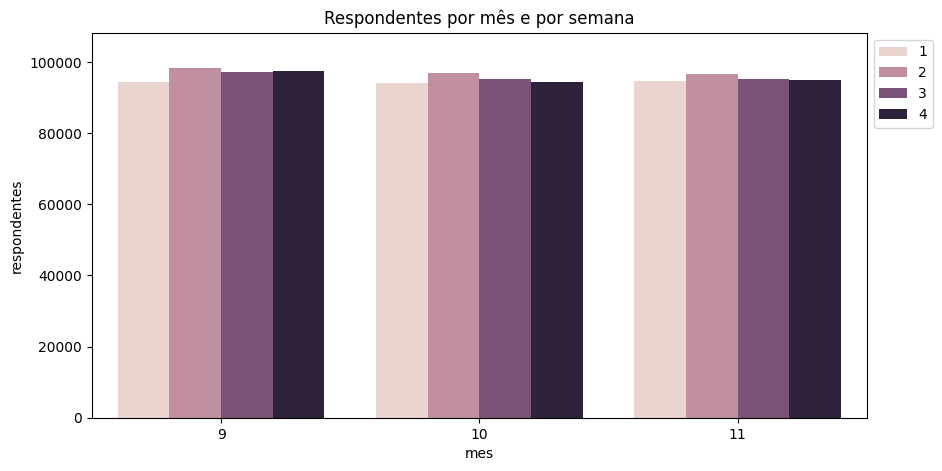

In [93]:
# respondente por mês e por semana
respondentes = id_df.groupby(['mes', 'semana']).size().reset_index(name='respondentes')

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=respondentes, x='mes', y='respondentes', hue='semana', ax=ax)
plt.title('Respondentes por mês e por semana')
plt.ylim(0, respondentes['respondentes'].max() * 1.1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [94]:
# print total de respondentes
print(f'Total de respondentes: {respondentes.respondentes.sum()}')

Total de respondentes: 1149197


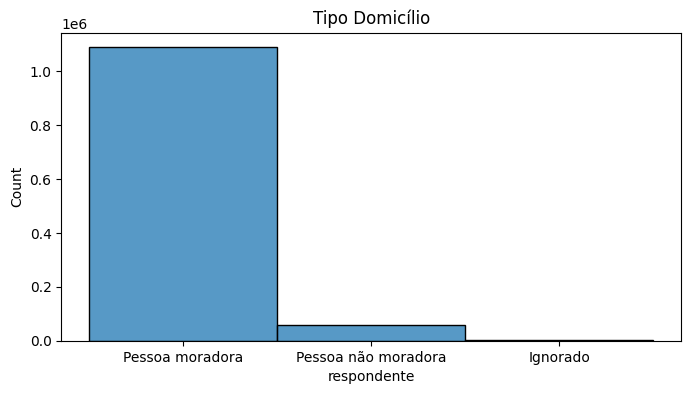

In [95]:
# histograma de respondente
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(id_df, x='respondente', kde=False, ax=ax)
plt.title('Tipo Domicílio')
plt.show()

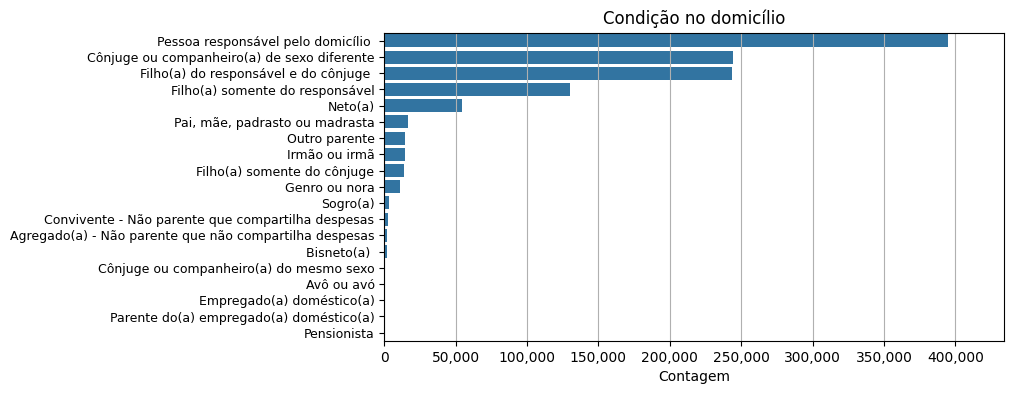

In [96]:
# count condição no domicílio
condicao_df = id_df.groupby('condicao_no_domicilio').size().reset_index(name='count')
# sort desc
condicao_df = condicao_df.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=condicao_df, x='count', y='condicao_no_domicilio', ax=ax, orient='h')
plt.title('Condição no domicílio')
plt.xlim(0, condicao_df['count'].max() * 1.1)
plt.yticks(fontsize=9)
plt.ylabel('')
plt.xlabel('Contagem')
ax.xaxis.grid(True)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

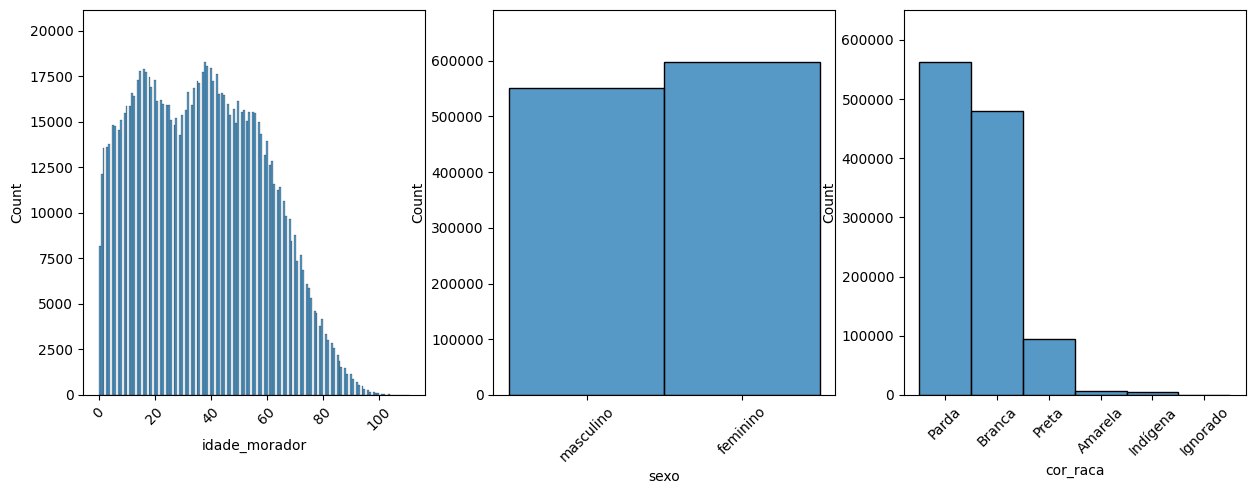

In [97]:
# idade, sexo e raça groups histogram
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(id_df, x='idade_morador', kde=False, ax=ax[0])
sns.histplot(id_df, x='sexo', kde=False, ax=ax[1])
sns.histplot(id_df, x='cor_raca', kde=False, ax=ax[2])
for ax_ in ax:
    ax_.tick_params(axis='x', rotation=45)
for ax_ in ax:
    ax_.set_ylim(0, ax_.get_ylim()[1] * 1.1)
plt.show()

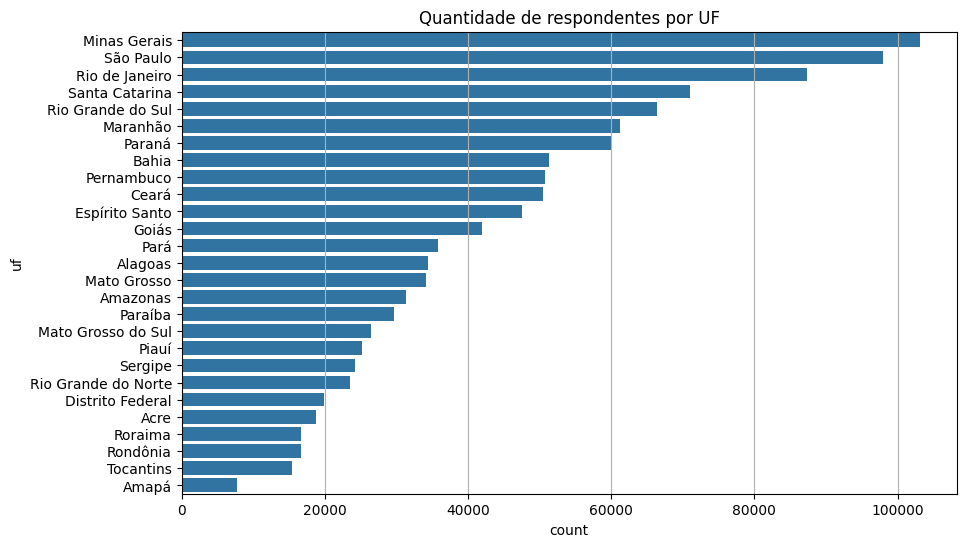

In [98]:
# group by uf, count and plot
uf_df = id_df.groupby('uf').size().reset_index(name='count')
uf_df = uf_df.sort_values(by='count', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=uf_df, x='count', y='uf', orient='h', ax=ax)
ax.set_title('Quantidade de respondentes por UF')
ax.grid(axis='x')
plt.show()

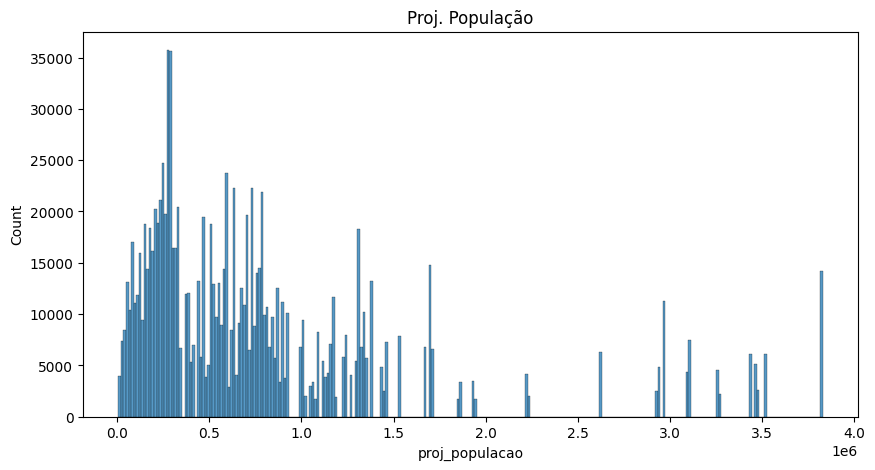

In [99]:
# histograma de proj_populacao
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='proj_populacao', kde=False, ax=ax)
plt.title('Proj. População')
plt.show()

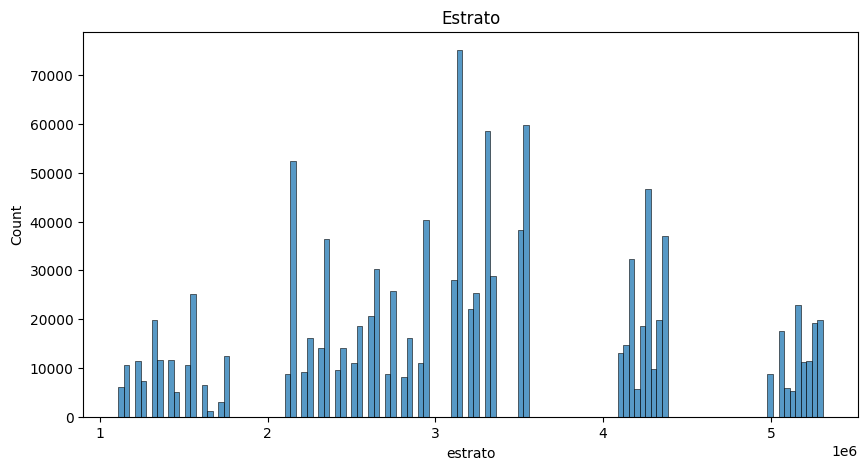

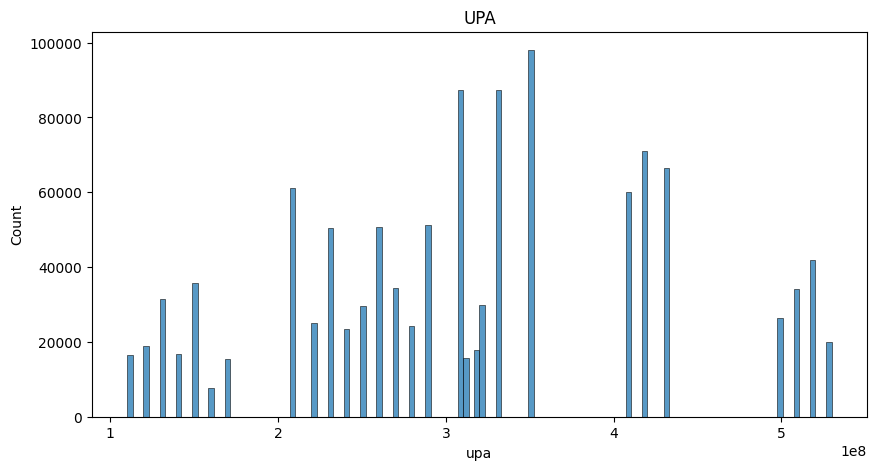

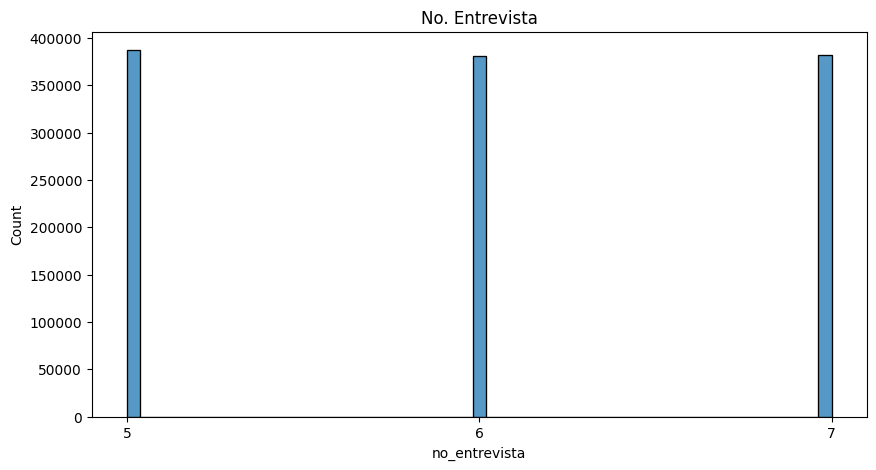

In [100]:
# histograma de estrato
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='estrato', kde=False, ax=ax)
plt.title('Estrato')
plt.show()

# histograma de upa
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='upa', kde=False, ax=ax)
plt.title('UPA')
plt.show()

# histograma de no_entrevista
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='no_entrevista', kde=False, ax=ax)
plt.title('No. Entrevista')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

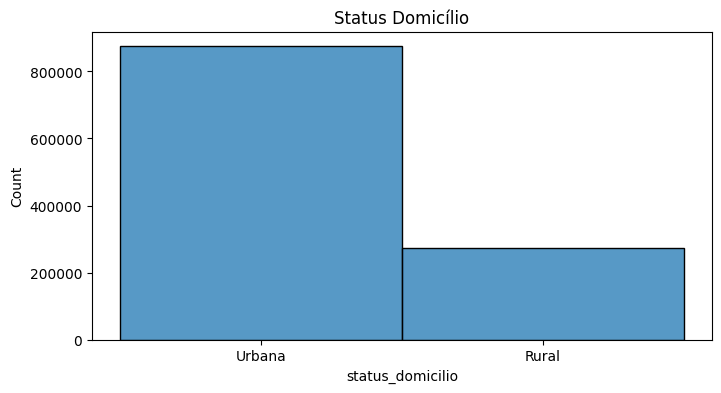

In [101]:
# histograma de status_domicilio
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(id_df, x='status_domicilio', kde=False, ax=ax)
plt.title('Status Domicílio')
plt.show()

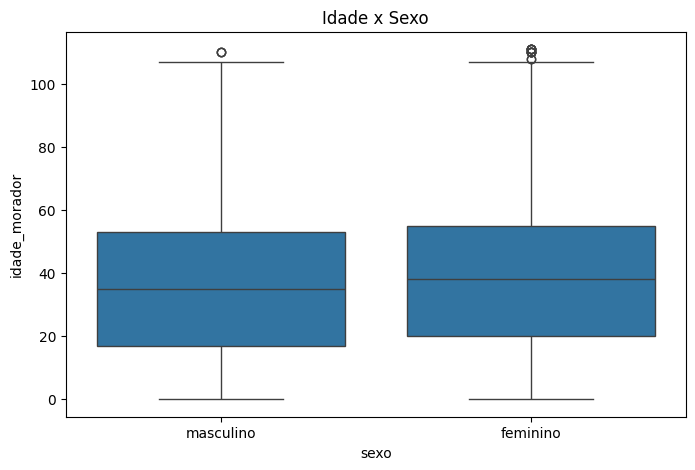

In [102]:
# idade x sexo
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=id_df, x='sexo', y='idade_morador', ax=ax)
plt.title('Idade x Sexo')
plt.show()

Saúde

In [103]:
sintomas_df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas//sintomas_df.csv')

sintomas_df.head()

,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia
0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
3,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [104]:
providencias_df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/providencias_df.csv')

providencias_df.head()

,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia
0,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


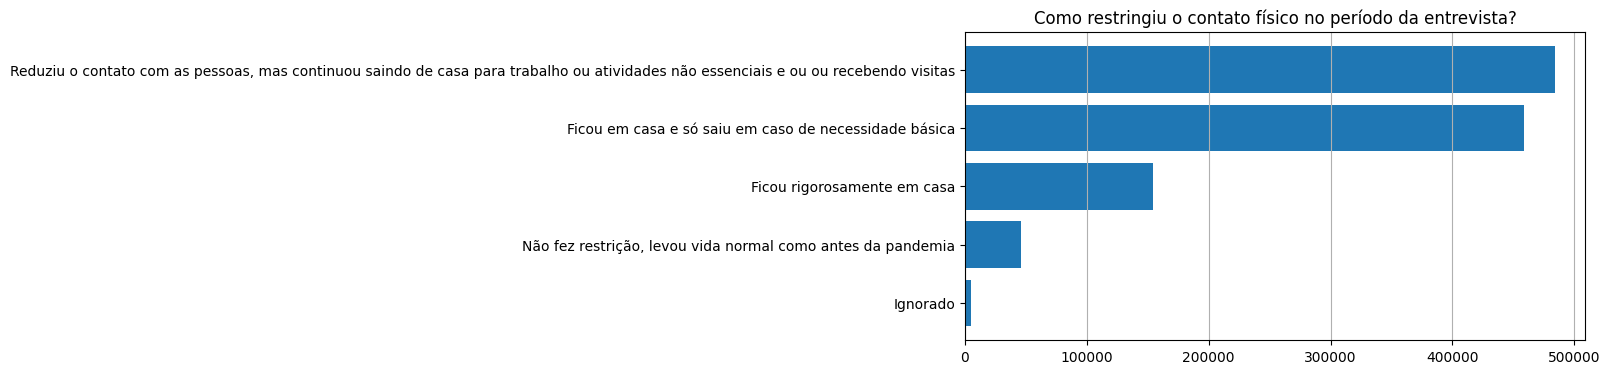

In [105]:
# group by como_restringiu_contato_fisico, count and plot
restringiu_df = providencias_df.groupby('como_restringiu_contato_fisico').size().reset_index(name='count')
restringiu_df = restringiu_df.sort_values(by='count')

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(restringiu_df['como_restringiu_contato_fisico'], restringiu_df['count'])
ax.set_title('Como restringiu o contato físico no período da entrevista?')
ax.grid(axis='x')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_25100\1473958785.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


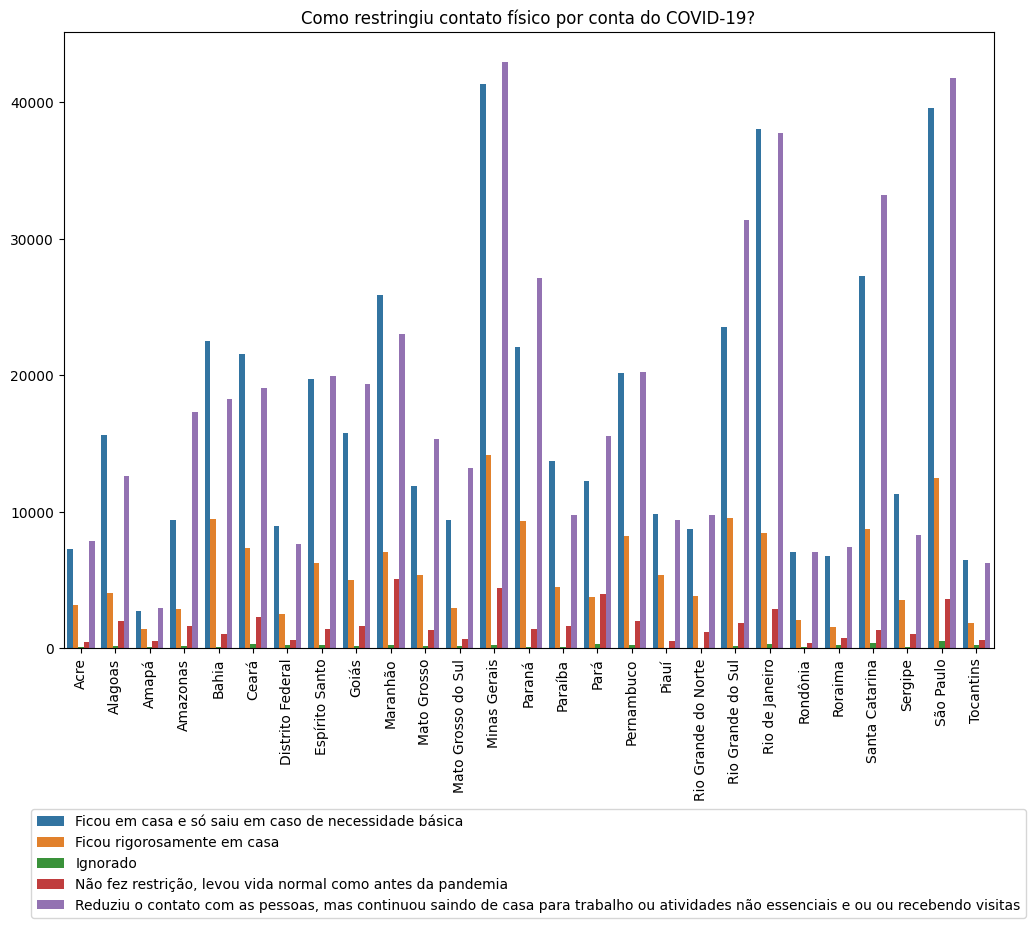

In [106]:
# group by uf, "como_restringiu_contato_fisico" value counts
restringiu_df = df.groupby(['uf', 'como_restringiu_contato_fisico']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=restringiu_df, x='uf', y='count', hue='como_restringiu_contato_fisico', ax=ax)
ax.set_title('Como restringiu contato físico por conta do COVID-19?')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

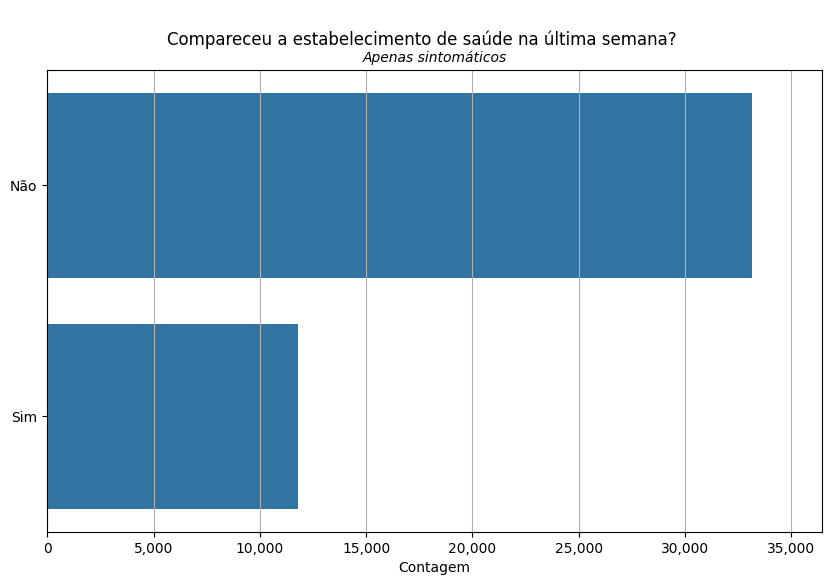

In [107]:
# group by compareceu_estabelecimento_de_saude, count and plot
compareceu_df = providencias_df.groupby('compareceu_estabelecimento_de_saude').size().reset_index(name='count')
compareceu_df = compareceu_df.sort_values(by='count', ascending=False)
# Remover Ignorado / Não aplicável
compareceu_df = compareceu_df[compareceu_df['compareceu_estabelecimento_de_saude'] != 'Ignorado / Não aplicável']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=compareceu_df, x='count', y='compareceu_estabelecimento_de_saude', orient='h', ax=ax)
plt.suptitle('\nCompareceu a estabelecimento de saúde na última semana?')
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
ax.set_xlim(0, compareceu_df['count'].max() * 1.1)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel('')
ax.set_xlabel('Contagem')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_25100\757646397.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


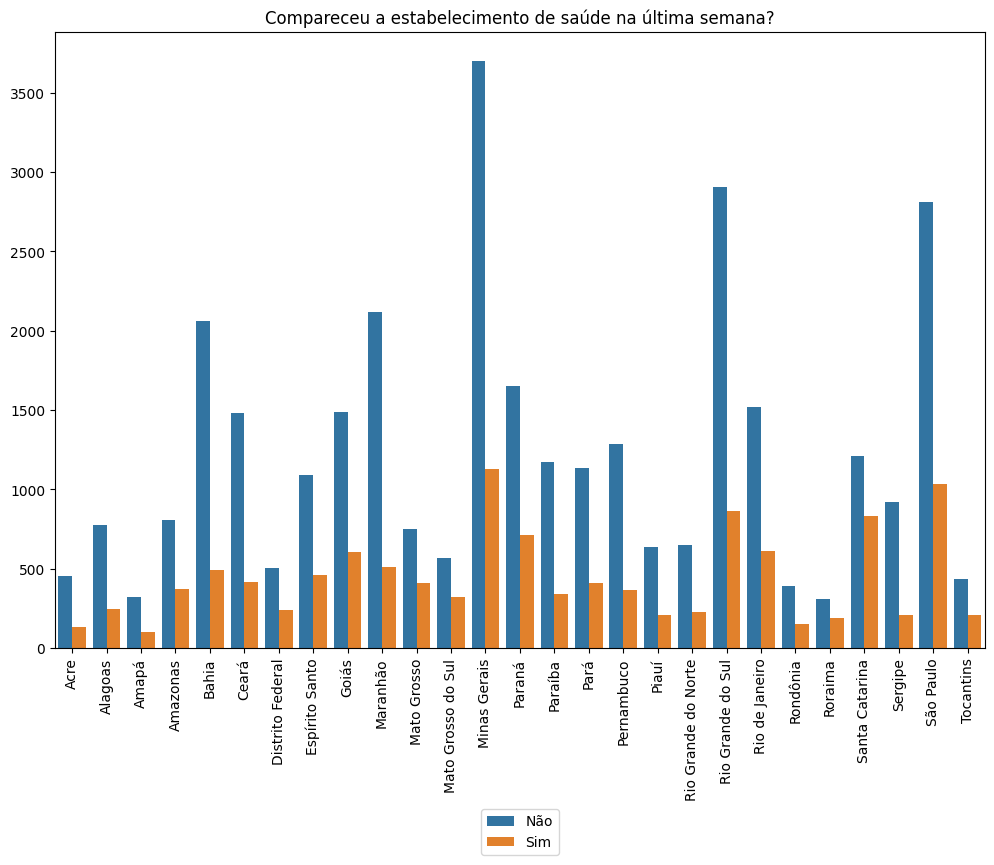

In [108]:
# group by uf, "como_restringiu_contato_fisico" value counts
compareceu_uf_df = df.groupby(['uf', 'compareceu_estabelecimento_de_saude']).size().reset_index(name='count')
# drop Não informado or Ignorado / Não aplicável
compareceu_uf_df = compareceu_uf_df[compareceu_uf_df['compareceu_estabelecimento_de_saude'] != 'Ignorado / Não aplicável']

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=compareceu_uf_df, x='uf', y='count', hue='compareceu_estabelecimento_de_saude', ax=ax)
ax.set_title('Compareceu a estabelecimento de saúde na última semana?')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_25100\1023313204.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  compareceu_uf_df = compareceu_uf_df.groupby('uf').apply(lambda x: x[x['compareceu_estabelecimento_de_saude'] == 'Sim']['count'].sum() / x['count'].sum() * 100)\
C:\Users\camil\AppData\Local\Temp\ipykernel_25100\1023313204.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


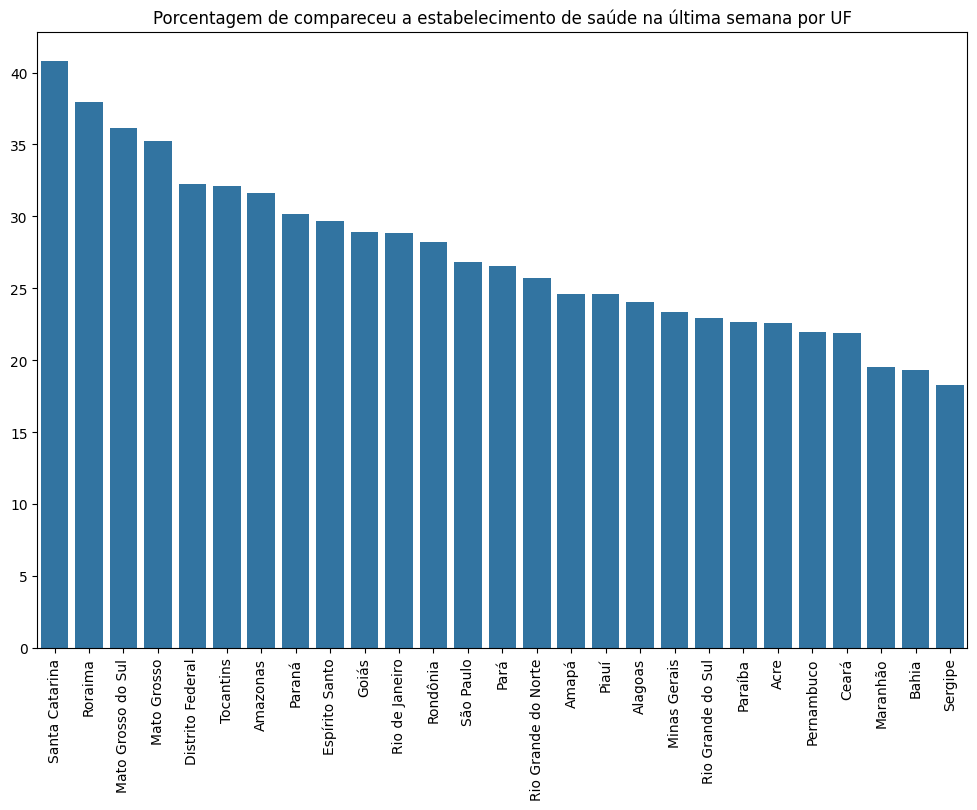

In [109]:
# % de compareceu_estabelecimento_de_saude por UF
compareceu_uf_df = compareceu_uf_df.groupby('uf').apply(lambda x: x[x['compareceu_estabelecimento_de_saude'] == 'Sim']['count'].sum() / x['count'].sum() * 100)\
                                                        .reset_index(name='percent').copy()
compareceu_uf_df = compareceu_uf_df.sort_values(by='percent', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=compareceu_uf_df, x='uf', y='percent', ax=ax)
ax.set_title('Porcentagem de compareceu a estabelecimento de saúde na última semana por UF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

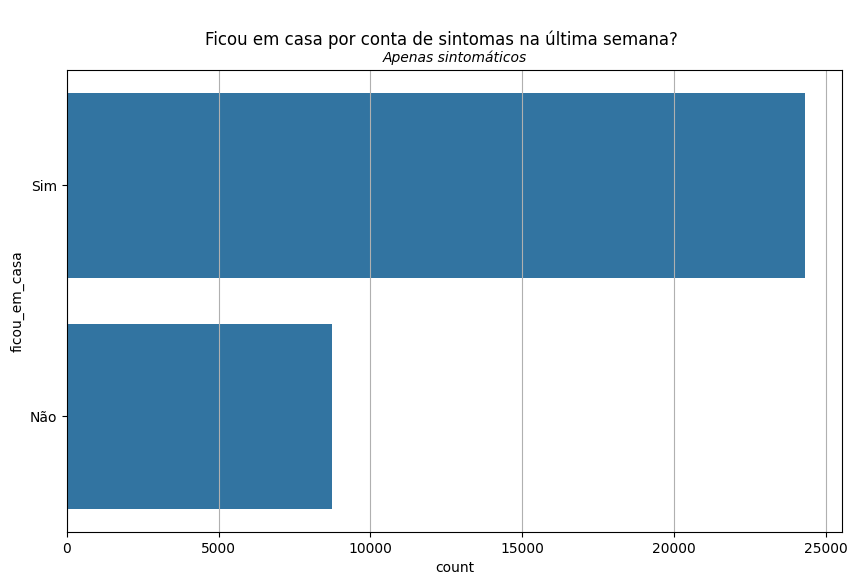

In [110]:
# ficou_em_casa
ficou_casa_df = providencias_df.groupby('ficou_em_casa').size().reset_index(name='count')
ficou_casa_df = ficou_casa_df.sort_values(by='count', ascending=False)
# drop Não informado or Ignorado / Não aplicável
ficou_casa_df = ficou_casa_df[(ficou_casa_df['ficou_em_casa'] != 'Não informado') & (ficou_casa_df['ficou_em_casa'] != 'Ignorado / Não aplicável')]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ficou_casa_df, x='count', y='ficou_em_casa', orient='h', ax=ax)
plt.suptitle('\nFicou em casa por conta de sintomas na última semana?')
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_25100\3766512778.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


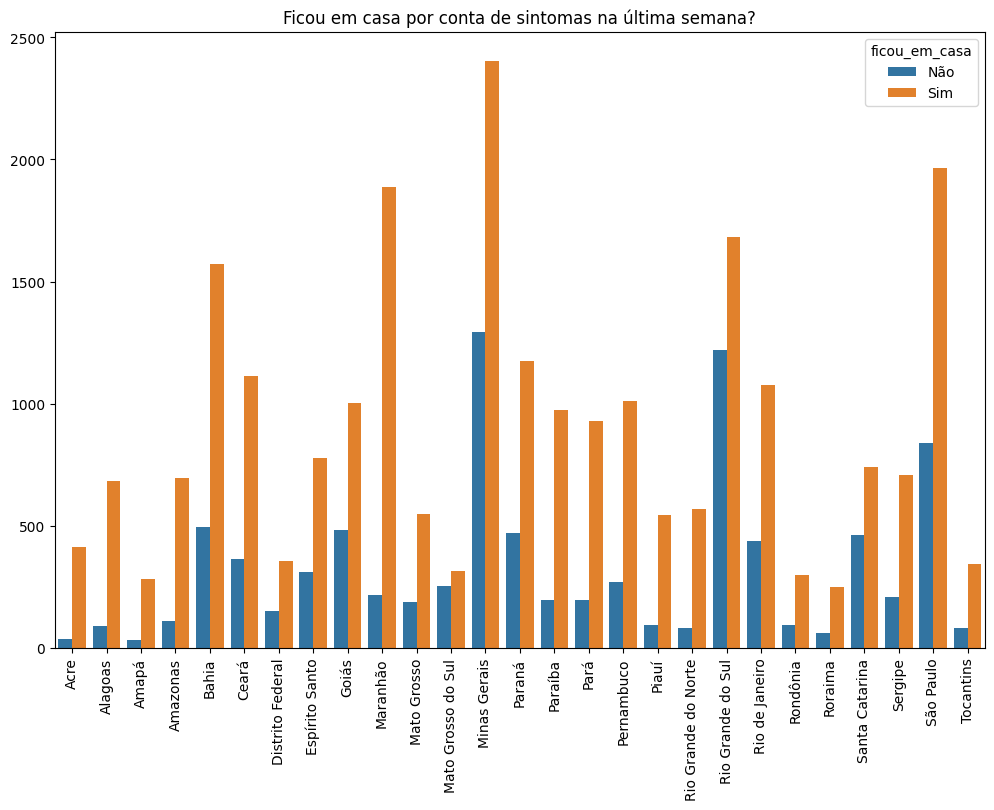

In [111]:
# group by df, ficou em casa
ficou_casa_uf_df = df.groupby(['uf', 'ficou_em_casa']).size().reset_index(name='count')
# drop Não informado or Ignorado / Não aplicável
ficou_casa_uf_df = ficou_casa_uf_df[(ficou_casa_uf_df['ficou_em_casa'] != 'Não informado') & (ficou_casa_uf_df['ficou_em_casa'] != 'Ignorado / Não aplicável')]

# plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=ficou_casa_uf_df, x='uf', y='count', hue='ficou_em_casa', ax=ax)
ax.set_title('Ficou em casa por conta de sintomas na última semana?')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

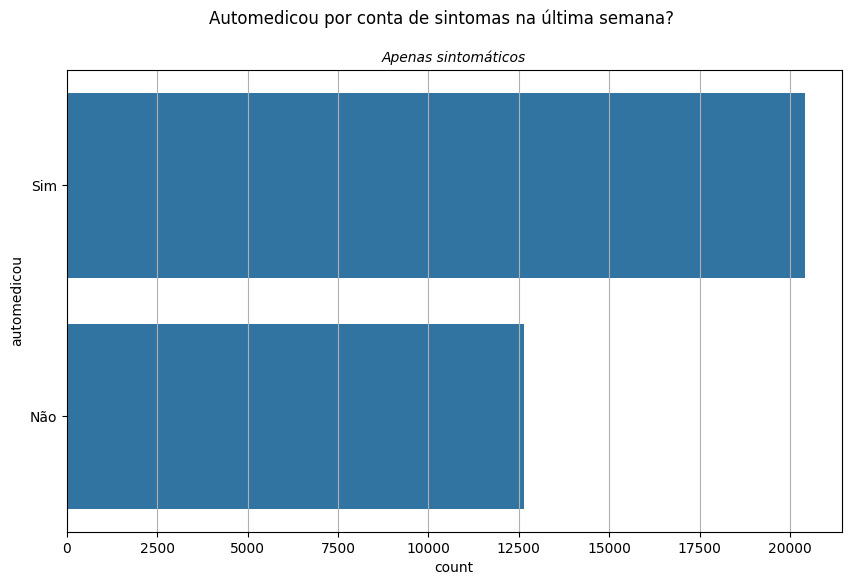

In [112]:
# automedicou
automedicou_df = providencias_df.groupby('automedicou').size().reset_index(name='count')
automedicou_df = automedicou_df.sort_values(by='count', ascending=False)
# drop Não informado or Ignorado / Não aplicável
automedicou_df = automedicou_df[(automedicou_df['automedicou'] != 'Não informado') & (automedicou_df['automedicou'] != 'Ignorado / Não aplicável')]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=automedicou_df, x='count', y='automedicou', orient='h', ax=ax)
plt.suptitle('Automedicou por conta de sintomas na última semana?')
# apenas sintomáticos
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
plt.show()

In [113]:
testagem_df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/testagem_df.csv')

testagem_df.head()

,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco
0,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


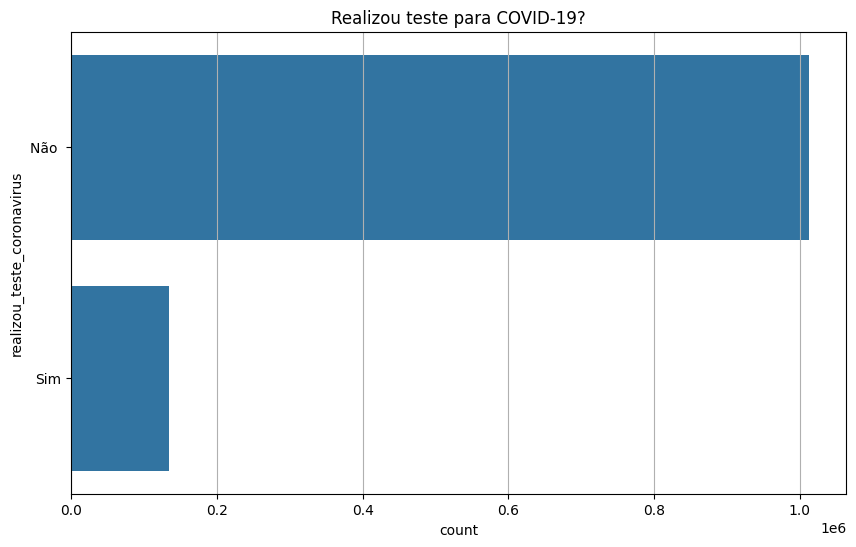

Quantidade de respostas Sim+Não: 1146784
Porcentagem de respostas Sim/Total: 11.62%


In [114]:
# check realizou_teste_coronavirus
realizou_teste_df = testagem_df.groupby('realizou_teste_coronavirus').size().reset_index(name='count')
realizou_teste_df = realizou_teste_df.sort_values(by='count', ascending=False)
# drop Ignorado
realizou_teste_df = realizou_teste_df[realizou_teste_df['realizou_teste_coronavirus'] != 'Ignorado']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=realizou_teste_df, x='count', y='realizou_teste_coronavirus', orient='h', ax=ax)
ax.set_title('Realizou teste para COVID-19?')
ax.grid(axis='x')
plt.show()

# print Sim, Não, Sim/Sim+Não
print(f'Quantidade de respostas Sim+Não: {realizou_teste_df["count"].sum()}')
print(f'Porcentagem de respostas Sim/Total: {realizou_teste_df[realizou_teste_df["realizou_teste_coronavirus"] == "Sim"]["count"].sum() / testagem_df.shape[0] * 100:.2f}%')

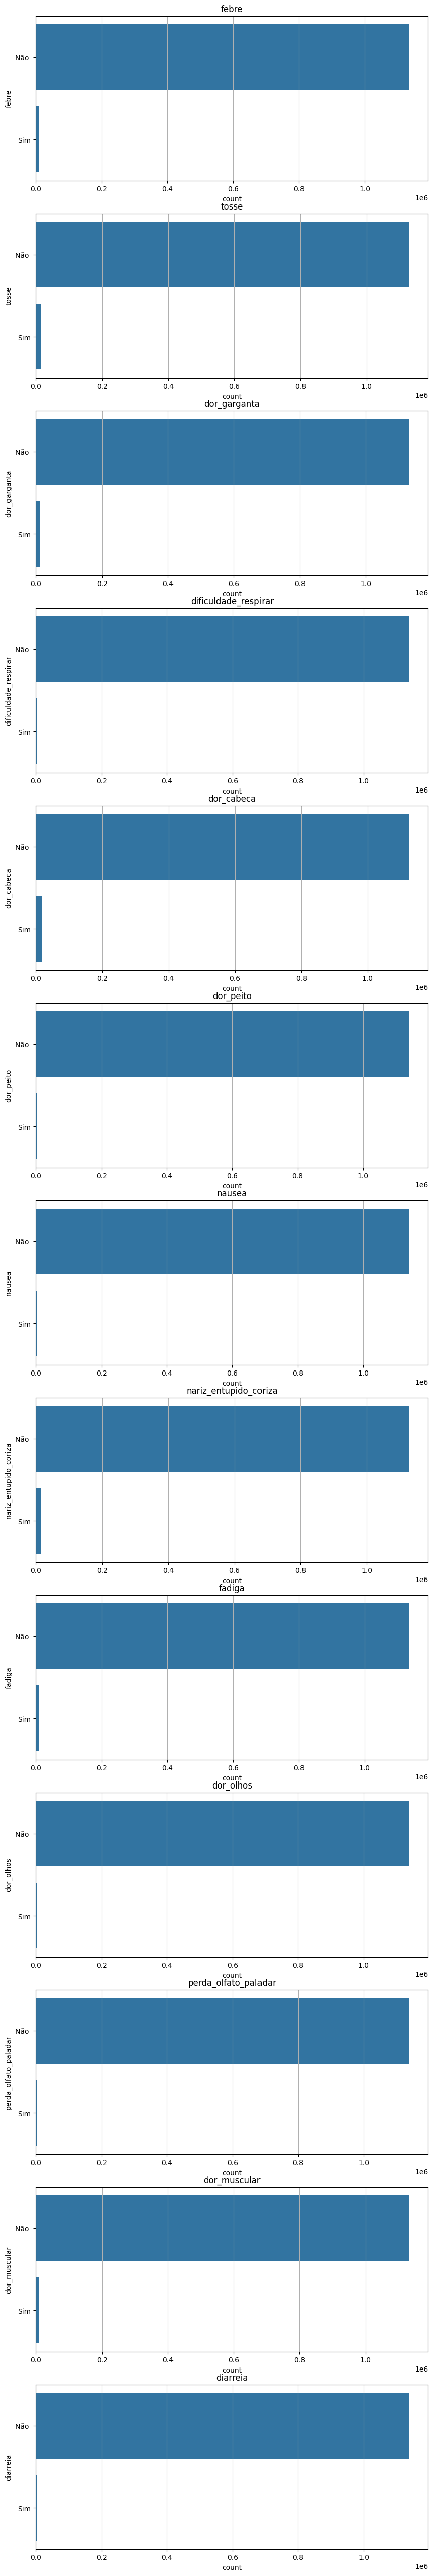

In [115]:
# plot all columns in sintomas_df value counts in one figure
n_charts = len(sintomas_df.columns)

fig, ax = plt.subplots(n_charts, 1, figsize=(10, 5 * n_charts))
for i, col in enumerate(sintomas_df.columns):
    # drop Não informado or Ignorado / Não aplicável for chart
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    sns.barplot(data=sintomas_chart_df, x='count', y=col, orient='h', ax=ax[i])
    ax[i].set_title(f'{col}')
    ax[i].grid(axis='x')
plt.show()

In [116]:
# for col in sintomas_df, calculate % of sim removing Não sabe / Ignorado
for col in sintomas_df.columns:
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    print(f'{col}: {sintomas_chart_df[sintomas_chart_df[col] == "Sim"]["count"].sum() / sintomas_chart_df["count"].sum() * 100:.2f}%')

febre: 0.79%
tosse: 1.34%
dor_garganta: 1.10%
dificuldade_respirar: 0.42%
dor_cabeca: 1.66%
dor_peito: 0.30%
nausea: 0.35%
nariz_entupido_coriza: 1.41%
fadiga: 0.72%
dor_olhos: 0.32%
perda_olfato_paladar: 0.39%
dor_muscular: 0.95%
diarreia: 0.38%


In [117]:
sintomas_percents = pd.DataFrame()

# plot sintomas percent sorted
for col in sintomas_df.columns:
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    sintomas_chart_df['percent'] = (sintomas_chart_df['count'] / sintomas_chart_df['count'].sum() * 100).round(2)
    sintomas_chart_df = sintomas_chart_df.sort_values(by='percent', ascending=False)
    sintomas_chart_df = sintomas_chart_df.drop(columns='count')
    sintomas_percents[col] = sintomas_chart_df.set_index(col).to_dict()['percent']
    sintomas_percents = sintomas_percents.T

sintomas_percents = sintomas_percents.sort_values(by='Sim', ascending=False)[['Sim']]
sintomas_percents = sintomas_percents.reset_index().rename(columns={'index': 'sintomas'})

sintomas_percents

,sintomas,Sim
0,dor_cabeca,1.66
1,dor_garganta,1.10
2,febre,0.79
3,fadiga,0.72
4,perda_olfato_paladar,0.39
5,diarreia,0.38
6,nausea,0.35


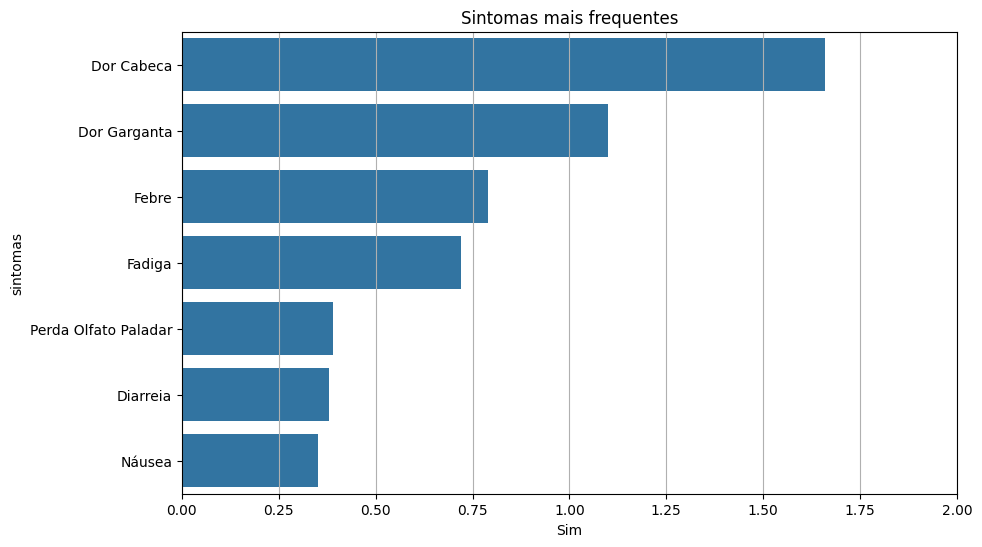

In [118]:
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.replace('_', ' ')
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.replace('nausea', 'náusea')
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.title()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=sintomas_percents, x='Sim', y='sintomas', orient='h', ax=ax)
ax.set_title('Sintomas mais frequentes')
ax.set_xlim(0, 2)
ax.grid(axis='x')
plt.show()

In [119]:
itens_higiene_df = pd.read_csv('C:/Users/camil/OneDrive/Área de Trabalho/Pós Graduação/Fase 3/Tech Challenge/BasesTratadas/itens_higiene_df.csv')

itens_higiene_df.head()

,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante
0,Sim,Sim,Sim,Não,Sim
1,Sim,Sim,Sim,Não,Sim
2,Sim,Sim,Sim,Não,Sim
3,Sim,Sim,Sim,Não,Sim
4,Sim,Sim,Sim,Não,Sim


In [120]:
itens_saude_df = pd.DataFrame()

# group by each column, count 'Sim' and 'Não'
for col in itens_higiene_df.columns:
    itens_higiene_chart_df = itens_higiene_df.groupby(col).size().reset_index(name='count')
    # transpose
    itens_higiene_chart_df = itens_higiene_chart_df.T
    # rename columns
    itens_higiene_chart_df.columns = itens_higiene_chart_df.iloc[0]
    # reset index
    itens_higiene_chart_df = itens_higiene_chart_df.reset_index()
    # rename to item
    itens_higiene_chart_df = itens_higiene_chart_df.rename(columns={'index': 'item'})
    # drop first row
    itens_higiene_chart_df = itens_higiene_chart_df.drop(index=0)
    # concat with itens_saude_df
    itens_saude_df = pd.concat([itens_saude_df, itens_higiene_chart_df])

itens_saude_df

,item,Não,Não sabe,Sim
1,count,3529,291,1145377
1,count,41264,1133,1106800
1,count,5240,274,1143683
1,count,711631,4836,432730
1,count,13749,1103,1134345
